In [74]:
# Initialize Otter
import otter
grader = otter.Notebook("cs1090a_hw5.ipynb")

/Users/abhayduggirala/micromamba/envs/cs109a/lib/python3.13/site-packages/nbformat/__init__.py:96: MissingIDFieldWarning: Cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS1090A Introduction to Data Science: 
## Homework 5: Multiclass Classification & Decision Trees

**Harvard University**<br/>
**Fall 2024**<br/>
**Instructors**: Pavlos Protopapas and Natesh Pillai

<hr style="height:2.4pt">

In [75]:
# RUN THIS CELL 
import requests
from IPython.core.display import display, HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text

# scrollable output
styles += """
<style>
    div.output_scroll { 
        height: 300px; 
        overflow-y: auto;
    }
    
    div.output_wrapper {
        overflow-x: auto;
    }
</style>
"""
HTML(styles)

/var/folders/lj/_r6ssxtn5yg4qrv1yh1jfmlh0000gn/T/ipykernel_8423/1233485917.py:3: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


# 🎓 Predicting Student Outcomes 🕳️

In this assignment, you will construct and evaluate classification models to predict student outcomes (“Dropout,” “Enrolled,” or “Graduate”) using demographic, socio-economic, and academic data available at the point of enrollment. The aim is to identify students at risk and understand the factors contributing to their academic outcomes.

The dataset used in this assignment originates from the Polytechnic Institute of Portalegre, Portugal, and includes information such as demographics, socio-economic background, and academic history at the time of enrollment. The classification task involves predicting whether a student will graduate, remain enrolled, or drop out, which poses unique challenges, including class imbalance.

More information on the dataset and related modeling approaches can be found in the paper "Early Prediction of Student’s Performance in Higher Education: A Case Study" by Martins et al.. We have included a PDF of this paper in the data directory for your reference.

<div style = "border: thin solid black; border-radius: 2px; padding: 5px">
<details>
<summary><strong>Dataset Information</strong> (click to expand)</summary>

| Variable Name                       | Description                                                                                                                                                                                                                             |
|-------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Marital Status                      | **1** – single, **2** – married, **3** – widower, **4** – divorced, **5** – facto union, **6** – legally separated                                                                                                                                              |
| Application mode                    | **1** - 1st phase - general contingent, **2** - Ordinance No. 612/93, **5** - 1st phase - special contingent (Azores Island), **7** - Holders of other higher courses, **10** - Ordinance No. 854-B/99, **15** - International student (bachelor), **16** - 1st phase - special contingent (Madeira Island), **17** - 2nd phase - general contingent, **18** - 3rd phase - general contingent, **26** - Ordinance No. 533-A/99, item b2) (Different Plan), **27** - Ordinance No. 533-A/99, item b3 (Other Institution), **39** - Over 23 years old, **42** - Transfer, **43** - Change of course, **44** - Technological specialization diploma holders, **51** - Change of institution/course, **53** - Short cycle diploma holders, **57** - Change of institution/course (International) |
| Application order                   | Application order (between **0** - first choice and **9** - last choice)                                                                                                                                                                        |
| Course                              | **33** - Biofuel Production Technologies, **171** - Animation and Multimedia Design, **8014** - Social Service (evening attendance), **9003** - Agronomy, **9070** - Communication Design, **9085** - Veterinary Nursing, **9119** - Informatics Engineering, **9130** - Equinculture, **9147** - Management, **9238** - Social Service, **9254** - Tourism, **9500** - Nursing, **9556** - Oral Hygiene, **9670** - Advertising and Marketing Management, **9773** - Journalism and Communication, **9853** - Basic Education, **9991** - Management (evening attendance) |
| Daytime/evening attendance          | **1** – daytime, **0** - evening                                                                                                                                                                                                                |
| Previous qualification              | **1** - Secondary education, **2** - Higher education - bachelor's degree, **3** - Higher education - degree, **4** - Higher education - master's, **5** - Higher education - doctorate, **6** - Frequency of higher education, **9** - 12th year of schooling - not completed, **10** - 11th year of schooling - not completed, **12** - Other - 11th year of schooling, **14** - 10th year of schooling, **15** - 10th year of schooling - not completed, **19** - Basic education 3rd cycle (9th/10th/11th year) or equiv., **38** - Basic education 2nd cycle (6th/7th/8th year) or equiv., **39** - Technological specialization course, **40** - Higher education - degree (1st cycle), **42** - Professional higher technical course, **43** - Higher education - master (2nd cycle) |
| Previous qualification (grade)      | Grade of previous qualification (between **0** and **200**)                                                                                                                                                                                      |
| Nationality                         | **1** - Portuguese, **2** - German, **6** - Spanish, **11** - Italian, **13** - Dutch, **14** - English, **17** - Lithuanian, **21** - Angolan, **22** - Cape Verdean, **24** - Guinean, **25** - Mozambican, **26** - Santomean, **32** - Turkish, **41** - Brazilian, **62** - Romanian, **100** - Moldova (Republic of), **101** - Mexican, **103** - Ukrainian, **105** - Russian, **108** - Cuban, **109** - Colombian |
| Mother's qualification              | **1** - Secondary Education - 12th Year of Schooling or Eq., **2** - Higher Education - Bachelor's Degree, **3** - Higher Education - Degree, **4** - Higher Education - Master's, **5** - Higher Education - Doctorate, **6** - Frequency of Higher Education, **9** - 12th Year of Schooling - Not Completed, **10** - 11th Year of Schooling - Not Completed, **11** - 7th Year (Old), **12** - Other - 11th Year of Schooling, **14** - 10th Year of Schooling, **18** - General commerce course, **19** - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv., **22** - Technical-professional course, **26** - 7th year of schooling, **27** - 2nd cycle of the general high school course, **29** - 9th Year of Schooling - Not Completed, **30** - 8th year of schooling, **34** - Unknown, **35** - Can't read or write, **36** - Can read without having a 4th year of schooling, **37** - Basic education 1st cycle (4th/5th year) or equiv., **38** - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv., **39** - Technological specialization course, **40** - Higher education - degree (1st cycle), **41** - Specialized higher studies course, **42** - Professional higher technical course, **43** - Higher Education - Master (2nd cycle), **44** - Higher Education - Doctorate (3rd cycle) |
| Father's qualification              | Similar values as Mother's qualification (refer to full details above)                                                                                                                                                                   |
| Mother's occupation                 | **0** - Student, **1** - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers, **2** - Specialists in Intellectual and Scientific Activities, **3** - Intermediate Level Technicians and Professions, **4** - Administrative staff, **5** - Personal Services, Security and Safety Workers and Sellers, **6** - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry, **7** - Skilled Workers in Industry, Construction and Craftsmen, **8** - Installation and Machine Operators and Assembly Workers, **9** - Unskilled Workers, **10** - Armed Forces Professions, **90** - Other Situation, **99** - (blank), **122** - Health professionals, **123** - teachers, **125** - Specialists in information and communication technologies (ICT), **131** - Intermediate level science and engineering technicians and professions, **132** - Technicians and professionals, of intermediate level of health, **134** - Intermediate level technicians from legal, social, sports, cultural and similar services, **141** - Office workers, secretaries in general and data processing operators, **143** - Data, accounting, statistical, financial services and registry-related operators, **144** - Other administrative support staff, **151** - personal service workers, **152** - sellers, **153** - Personal care workers and the like, **171** - Skilled construction workers and the like, except electricians, **173** - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like, **175** - Workers in food processing, woodworking, clothing and other industries and crafts, **191** - cleaning workers, **192** - Unskilled workers in agriculture, animal production, fisheries and forestry, **193** - Unskilled workers in extractive industry, construction, manufacturing and transport, **194** - Meal preparation assistants |
| Father's occupation                 | Similar values as Mother's occupation (refer to full details above)                                                                                                                                                                     |
| Admission grade                     | Admission grade (between **0** and **200**)                                                                                                                                                                                                     |
| Displaced                           | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Educational special needs           | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Debtor                              | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Tuition fees up to date             | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Gender                              | **1** – male, **0** – female                                                                                                                                                                                                                     |
| Scholarship holder                  | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Age at enrollment                   | Age of student at enrollment                                                                                                                                                                                                            |
| International                       | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Curricular units 1st sem (credited) | Number of curricular units credited in the 1st semester                                                                                                                                                                                  |
| Curricular units 1st sem (enrolled) | Number of curricular units enrolled in the 1st semester                                                                                                                                                                                  |
| Curricular units 1st sem (evaluations) | Number of evaluations to curricular units in the 1st semester                                                                                                                                                                            |
| Curricular units 1st sem (approved) | Number of curricular units approved in the 1st semester                                                                                                                                                                                  |
| Curricular units 1st sem (grade)    | Grade average in the 1st semester (between **0** and **20**)                                                                                                                                                                                     |
| Curricular units 1st sem (without evaluations) | Number of curricular units without evaluations in the 1st semester                                                                                                                                                                       |
| Curricular units 2nd sem (credited) | Number of curricular units credited in the 2nd semester                                                                                                                                                                                  |
| Curricular units 2nd sem (enrolled) | Number of curricular units enrolled in the 2nd semester                                                                                                                                                                                  |
| Curricular units 2nd sem (evaluations) | Number of evaluations to curricular units in the 2nd semester                                                                                                                                                                            |
| Curricular units 2nd sem (approved) | Number of curricular units approved in the 2nd semester                                                                                                                                                                                  |
| Curricular units 2nd sem (grade)    | Grade average in the 2nd semester (between **0** and **20**)                                                                                                                                                                                     |
| Curricular units 2nd sem (without evaluations) | Number of curricular units without evaluations in the 2nd semester                                                                                                                                                                       |
| Unemployment rate                   | Unemployment rate (%)                                                                                                                                                                                                                    |
| Inflation rate                      | Inflation rate (%)                                                                                                                                                                                                                       |
| GDP                                 | GDP                                                                                                                                                                                                                                      |
| Target                              | The problem is formulated as a three-category classification task: **dropout**, **enrolled**, or **graduate** at the end of the normal duration of the course                                                                                                                              |

</details>
</div>

<p>
<span style = "background: lightgreen; border: thin solid black; border-radius: 2px; padding: 5px">
<strong>Guidelines</strong>
</span>
</p>

This assignment is intentionally **open-ended**. You will not receive explicit instructions for every step—it is up to you to **make informed decisions** and **justify** them.

Consider every choice carefully, and support your decisions with **evidence** such as plots, metrics, or references to the literature.

The goal is to apply your data science expertise to a real-world problem where there may not be a single correct answer but rather multiple valid approaches that can be logically defended.

Feel free to add code and markdown cells as you need them. 

<span style = "background: lightgreen; border: thin solid black; border-radius: 2px; padding: 5px">
<strong>HW5 Overview</strong>
</span>

- EDA & General Preprocessing
- Model 1: OvR Logistic Regression
- Model 2: Decicion Tree Classifier
- Model 3: Custom Classifier
- Model Comparison & Kaggle Submissions
- Causal Inference (BONUS)
- Wrap-up

🏆 **Each of the 3 models has an associated Kaggle competition. Making it into the top 20 on any of the leaderboards will earn you bonus points.**

<span style = "background: violet; border: thin solid black; border-radius: 2px; padding: 5px">
<strong>Submission Requirements</strong>
</span>

- The notebook submitted to Canvas must **run from top to bottom** without errors and contain **all output**.
- Notebooks are intended for human readers. Prose should appear in markdown cells, not code comments.
- Notebooks should contain no excessive output and no non-functional code unless the latter is included with the expressive purpose of communicating something to the reader. 
- Predictions must be saved in the specified paths when the notebook is run to facilitate staff verification.
- Kaggle submissions whose performance cannot be reproduced by the appropriate model in the related notebook submission will be disqualified.

<p>
<span style = "background: red; border: thin solid black; border-radius: 2px; padding: 5px">
<strong>☣️ HW Submissions Copy-Pasted from Generative AI Output Will Receive No Credit ☣️</strong>
</span>
</p>



In [76]:
import os
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, cross_val_predict, \
                        GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, \
                            roc_curve, auc, roc_auc_score, precision_score, recall_score, f1_score
                            

In [78]:

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE


# For optional causal inference section
# from psmpy import PsmPy
# from psmpy.functions import cohenD
# from psmpy.plotting import *

In [ ]:
# For calculating total notebook runtime
notebook_start = time.time()

## EDA & General Preprocessing

Load and explore the dataset. Your EDA should help inform your later modeling decisions. 

**Hints:**

- Consider methods to handle class imbalance, feature scaling, categorical variable encoding, and any necessary feature engineering. Provide justification for the choice you make, including reasons for *not* taking certain actions that might be considered standard in the given context.
- You may decide that your different models require their own distinct preprocessing steps rather than taking a one-size-fits-all approach.
- Take a moment to look at the imports provided above. You may find these useful through the notebook.

---

In [79]:
# set settings
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', None)
sns.set_palette("husl")
seed = 109

# load and rename data
X_train = pd.read_csv("data/X_train.csv")
X_test = pd.read_csv("data/X_test.csv")
y_train = pd.read_csv("data/y_train.csv")

column_mapping = {
    'Marital status': 'marital_status',
    'Application mode': 'app_mode',
    'Application order': 'app_order',
    'Course': 'course',
    'Daytime/evening attendance': 'daytime',
    'Previous qualification': 'prev_qual',
    'Previous qualification (grade)': 'prev_qual_grade',
    'Nationality': 'nationality',
    "Mother's qualification": 'mother_qual',
    "Father's qualification": 'father_qual',
    "Mother's occupation": 'mother_occ',
    "Father's occupation": 'father_occ',
    'Admission grade': 'admission_grade',
    'Displaced': 'displaced',
    'Educational special needs': 'special_needs',
    'Debtor': 'debtor',
    'Tuition fees up to date': 'tuition_up_to_date',
    'Gender': 'gender',
    'Scholarship holder': 'scholarship',
    'Age at enrollment': 'age',
    'International': 'international',
    'Curricular units 1st sem (credited)': 'sem1_credited',
    'Curricular units 1st sem (enrolled)': 'sem1_enrolled',
    'Curricular units 1st sem (evaluations)': 'sem1_evaluations',
    'Curricular units 1st sem (approved)': 'sem1_approved',
    'Curricular units 1st sem (grade)': 'sem1_grade',
    'Curricular units 1st sem (without evaluations)': 'sem1_without_eval',
    'Curricular units 2nd sem (credited)': 'sem2_credited',
    'Curricular units 2nd sem (enrolled)': 'sem2_enrolled',
    'Curricular units 2nd sem (evaluations)': 'sem2_evaluations',
    'Curricular units 2nd sem (approved)': 'sem2_approved',
    'Curricular units 2nd sem (grade)': 'sem2_grade',
    'Curricular units 2nd sem (without evaluations)': 'sem2_without_eval',
    'Unemployment rate': 'unemployment',
    'Inflation rate': 'inflation',
    'GDP': 'gdp',
    'Target': 'target'
}

X_train = X_train.rename(columns=column_mapping)
X_test = X_test.rename(columns=column_mapping)
y_train = y_train.rename(columns=column_mapping)

df_train = X_train.copy()
df_train['target'] = y_train

In [80]:
display(X_train.head(10))
print("Here is a set of all the columns in X_train, i.e. our predictors, after renaming:")
print(X_train.columns)

,marital_status,app_mode,app_order,course,daytime,prev_qual,prev_qual_grade,nationality,mother_qual,father_qual,mother_occ,father_occ,admission_grade,displaced,special_needs,debtor,tuition_up_to_date,gender,scholarship,age,international,sem1_credited,sem1_enrolled,sem1_evaluations,sem1_approved,sem1_grade,sem1_without_eval,sem2_credited,sem2_enrolled,sem2_evaluations,sem2_approved,sem2_grade,sem2_without_eval,unemployment,inflation,gdp
0,1,1,6,9773,1,1,125.0,1,1,1,5,4,122.2,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06
1,1,17,2,9147,1,1,122.0,1,19,19,7,7,116.1,1,0,0,1,0,1,19,0,0,5,8,5,11.200000,0,0,5,5,3,11.000000,0,12.4,0.5,1.79
2,1,17,3,9670,1,1,123.0,1,38,38,7,8,118.8,1,1,0,1,0,1,18,0,0,6,10,5,12.000000,0,0,6,11,5,12.333333,0,11.1,0.6,2.02
3,1,39,1,9500,1,19,133.1,1,38,38,9,9,114.8,0,0,0,1,0,0,28,0,0,7,15,1,10.750000,0,0,7,10,1,10.000000,0,13.9,-0.3,0.79
4,2,7,1,9254,1,2,100.0,1,37,37,9,9,100.0,0,0,0,0,0,0,37,0,0,5,5,0,0.000000,0,0,5,10,0,0.000000,0,10.8,1.4,1.74
5,1,17,1,9670,1,1,155.0,1,1,19,4,8,134.7,1,0,0,1,0,0,20,0,0,6,8,5,13.400000,0,0,6,10,4,13.000000,0,12.7,3.7,-1.70
6,1,43,1,9147,1,1,133.1,1,4,19,2,1,128.2,0,0,0,1,0,0,23,0,7,11,18,11,15.090909,1,2,6,7,6,14.500000,0,9.4,-0.8,-3.12
7,1,17,3,9853,1,1,132.0,1,34,34,0,0,131.3,1,0,0,1,0,0,21,0,0,6,8,5,11.800000,0,0,6,8,4,10.500000,0,7.6,2.6,0.32
8,1,1,1,9119,1,1,130.0,1,37,19,9,5,140.2,1,0,0,1,1,0,20,0,0,5,5,0,0.000000,0,0,5,0,0,0.000000,0,9.4,-0.8,-3.12
9,1,44,1,9003,1,39,140.0,1,19,38,3,9,140.0,1,0,0,1,1,0,21,0,0,6,7,6,12.857143,0,0,6,6,6,13.166667,0,12.4,0.5,1.79


Here is a set of all the columns in X_train, i.e. our predictors, after renaming:
Index(['marital_status', 'app_mode', 'app_order', 'course', 'daytime',
       'prev_qual', 'prev_qual_grade', 'nationality', 'mother_qual',
       'father_qual', 'mother_occ', 'father_occ', 'admission_grade',
       'displaced', 'special_needs', 'debtor', 'tuition_up_to_date', 'gender',
       'scholarship', 'age', 'international', 'sem1_credited', 'sem1_enrolled',
       'sem1_evaluations', 'sem1_approved', 'sem1_grade', 'sem1_without_eval',
       'sem2_credited', 'sem2_enrolled', 'sem2_evaluations', 'sem2_approved',
       'sem2_grade', 'sem2_without_eval', 'unemployment', 'inflation', 'gdp'],
      dtype='object')


In [81]:
display(y_train.head(10))
print("Here is a set of all the columns in y_train, i.e. our response variable: ")
print(set(y_train.columns))

# get counts of each class
print("Here are the counts for each class: ")
y_train.value_counts()

,target
0,Graduate
1,Graduate
2,Graduate
3,Dropout
4,Dropout
5,Enrolled
6,Dropout
7,Dropout
8,Dropout
9,Graduate


Here is a set of all the columns in y_train, i.e. our response variable: 
{'target'}
Here are the counts for each class: 


target  
Graduate    1657
Dropout     1066
Enrolled     595
Name: count, dtype: int64

Notice that this is a case of class imbalance. The 'enrolled' class is significantly underrepresented compared to both the 'graduate' and 'dropout' classes. This imbalance could cause the model to bias towards predicting the majority classes, particularly 'graduate'. To address this, we may need to use techniques like class weights or SMOTE to ensure the model learns to identify the minority 'enrolled' class effectively and doesn't simply optimize overall accuracy by focusing on the larger classes.

To conduct a full EDA, I will split the predictors into three categories, each of which I believe are likely to impact student outcomes after the course is finished.
- Category 1: Demographic predictors. This category includes this like age, gender, marital status, nationality, and whether the student requires special needs.
- Category 2: Economic predictors. This category includes information about a student's socioeconomic status, like the parents' employment, the amount of debt they have, etc.
- Category 3: Academic predictors. This category includes information about a student's academic performance, including grades before application, grades after the first semester, and grades after the second semester.

I produce tables and pairplots for all three categories of predictors.

In [82]:
demographic_numeric = ['age']
demographic_categorical = ['gender', 'marital_status', 'special_needs', 'international', 'displaced']
demographic_predictors = demographic_numeric + demographic_categorical

economic_numeric = ['unemployment', 'inflation', 'gdp']
economic_categorical = ['mother_occ', 'father_occ', 'debtor', 'tuition_up_to_date', 'scholarship']
economic_predictors = economic_numeric + economic_categorical

academic_predictors = ['prev_qual_grade', 'admission_grade', 'sem1_grade', 'sem1_approved', 'sem1_enrolled', 'sem1_evaluations', 'sem2_grade', 'sem2_approved', 'sem2_enrolled', 'sem2_evaluations']

categorical_predictors = demographic_categorical + economic_categorical
numeric_predictors = demographic_numeric + economic_numeric + academic_predictors
predictors = categorical_predictors + numeric_predictors

X_train = X_train[predictors]
X_test = X_test[predictors]

Note: categorical variables with more than two categories have their small categories lumped into "other" (or -1) using a threshold value of 1%. I.e. if there is a category with fewer than 1 percent of observations, that category gets merged into "other".

In [83]:
def lump_small_categories(series, threshold_pct = 5):
  """
  lump small categories into 'other'
  """
  # get percentages
  value_counts = series.value_counts(normalize=True) * 100
  small_categories = value_counts[value_counts < threshold_pct].index
  
  # create new series with lumped categories
  lumped_series = series.copy()
  lumped_series[lumped_series.isin(small_categories)] = -1
  
  return lumped_series

df_train["marital_status"] = lump_small_categories(df_train["marital_status"])
df_train["mother_occ"] = lump_small_categories(df_train["mother_occ"])
df_train["father_occ"] = lump_small_categories(df_train["father_occ"])
X_train["marital_status"] = lump_small_categories(X_train["marital_status"])
X_train["mother_occ"] = lump_small_categories(X_train["mother_occ"])
X_train["father_occ"] = lump_small_categories(X_train["father_occ"])
X_test["marital_status"] = lump_small_categories(X_test["marital_status"])
X_test["mother_occ"] = lump_small_categories(X_test["mother_occ"])
X_test["father_occ"] = lump_small_categories(X_test["father_occ"])

Here are summary tables and figures for the three different sets of predictors:

In [84]:
def summarize_numeric(df, numeric_cols):
  """
  create summary table for numeric variables
  """
  summary = df[numeric_cols].agg(['mean', 'std', 'min', 'max']).round(2)
  return summary.T

def summarize_categorical(df, cat_cols):
  """
  create summary table for categorical variables 
  """
  summary_rows = []
  
  for col in cat_cols:
    dist = (df[col].value_counts(normalize=True) * 100).round(2)
    summary_rows.append({
        'variable': col,
        'n_unique': df[col].nunique(),
        'distribution': dist.to_dict()
    })
      
  return pd.DataFrame(summary_rows)

In [85]:
def plot_numeric(df, x_name, y_name, ax, title=None, xlabel=None, ylabel=None, rotate_labels=45, violin_kwargs=None):
    if violin_kwargs is None:
        violin_kwargs = {}
    
    sns.violinplot(data=df, x=df[x_name], y=df[y_name], ax=ax, **violin_kwargs)
    
    if title:
        ax.set_title(title)
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel(ylabel)
    ax.tick_params(axis='x', rotation=rotate_labels)
    
def plot_categorical(df, x_name, y_name, ax, title=None, value_map = None, xlabel=None, ylabel=None, rotate_labels=45, bar_kwargs=None):
    if bar_kwargs is None:
        bar_kwargs = {}
    
    if value_map is not None:
       y_values = df[y_name].map(value_map)
    else:
       y_values = df[y_name]
    
    # create crosstab with x classes as index and y as columns
    ct = pd.crosstab(index=df[x_name], columns=y_values, normalize='index') * 100
    
    
    # sort columns by size
    column_means = ct.mean()
    sorted_columns = column_means.sort_values().index
    ct = ct[sorted_columns]  # Reorder columns from smallest to largest
    
    ct.plot(kind='bar', stacked=True, ax=ax, **bar_kwargs)
    
    if title:
        ax.set_title(title)
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel('Percentage')
    ax.tick_params(axis='x', rotation=rotate_labels)
    ax.legend(title=y_name)

In [86]:
print("SUMMARY: DEMOGRAPHIC PREDICTORS")
print("-" * 50)

print("\nNumeric Variables:")
print(summarize_numeric(df_train, demographic_numeric))

print("\nCategorical Variables:")
print(summarize_categorical(df_train, demographic_categorical))

SUMMARY: DEMOGRAPHIC PREDICTORS
--------------------------------------------------

Numeric Variables:
      mean  std   min   max
age  23.25  7.6  17.0  70.0

Categorical Variables:
         variable  n_unique                  distribution
0          gender         2          {0: 64.92, 1: 35.08}
1  marital_status         3  {1: 89.0, 2: 8.32, -1: 2.68}
2   special_needs         2           {0: 98.82, 1: 1.18}
3   international         2           {0: 97.68, 1: 2.32}
4       displaced         2          {1: 54.67, 0: 45.33}


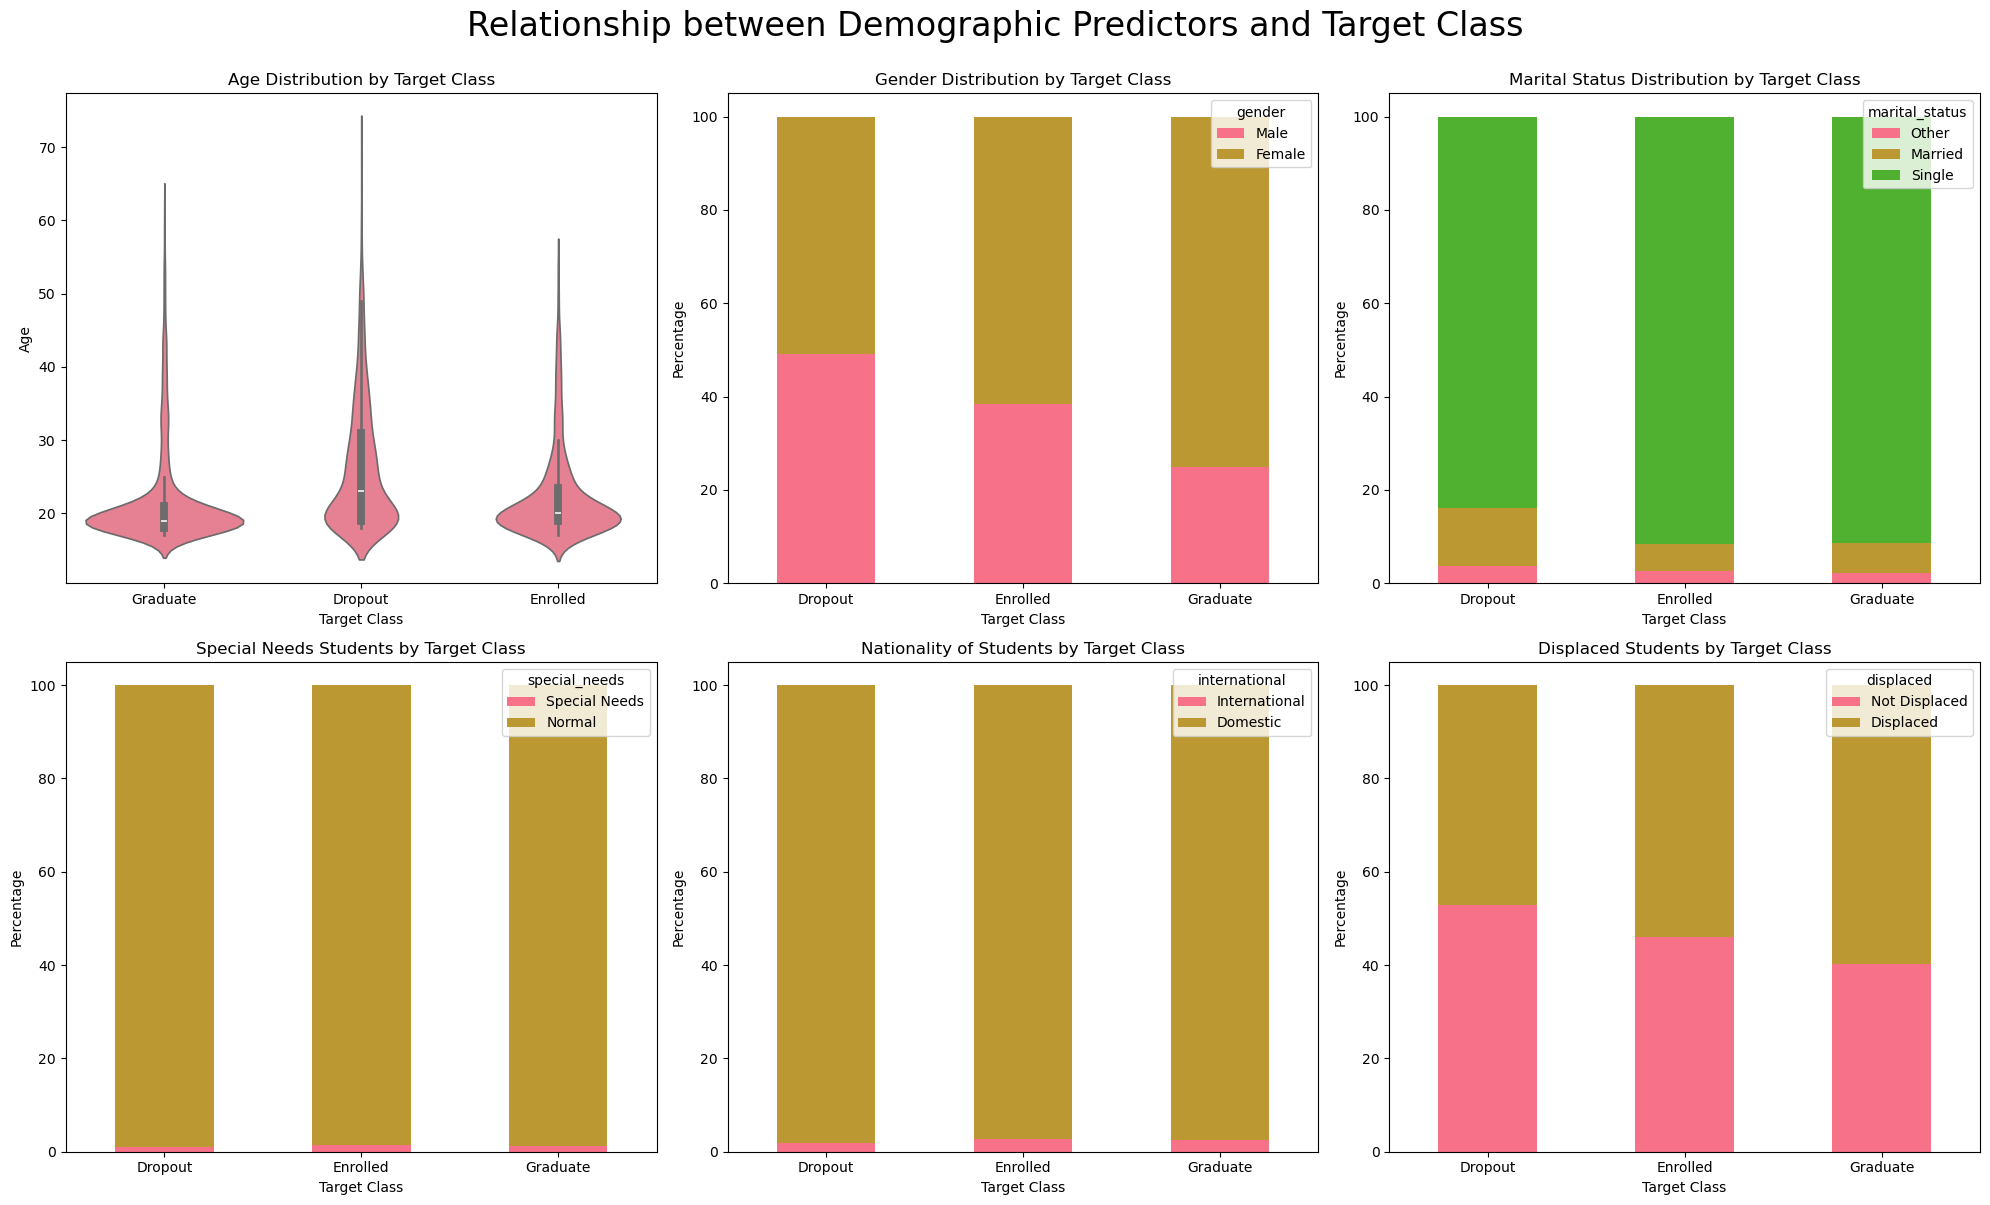

In [87]:
# subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Relationship between Demographic Predictors and Target Class', fontsize=24, y=1.00)

axes = axes.flatten()

plot_numeric(df_train, "target" , "age", axes[0], title="Age Distribution by Target Class", xlabel="Target Class", ylabel="Age", rotate_labels=0, violin_kwargs=None)
plot_categorical(df_train, "target" , "gender", axes[1], title="Gender Distribution by Target Class", value_map={0: "Female", 1: "Male"}, xlabel="Target Class", ylabel="Percentage", rotate_labels=0, bar_kwargs=None)
plot_categorical(df_train, "target" , "marital_status", axes[2], title="Marital Status Distribution by Target Class", value_map={1: "Single", 2: "Married", -1: "Other"}, xlabel="Target Class", ylabel="Percentage", rotate_labels=0, bar_kwargs=None)
plot_categorical(df_train, "target" , "special_needs", axes[3], title="Special Needs Students by Target Class", value_map={0: "Normal", 1: "Special Needs"}, xlabel="Target Class", ylabel="Percentage", rotate_labels=0, bar_kwargs=None)
plot_categorical(df_train, "target" , "international", axes[4], title="Nationality of Students by Target Class", value_map={0: "Domestic", 1: "International"}, xlabel="Target Class", ylabel="Percentage", rotate_labels=0, bar_kwargs=None)
plot_categorical(df_train, "target" , "displaced", axes[5], title="Displaced Students by Target Class", value_map={0: "Not Displaced", 1: "Displaced"}, xlabel="Target Class", ylabel="Percentage", rotate_labels=0, bar_kwargs=None)

plt.tight_layout()
plt.show()

In [88]:
print("\nSUMMARY: ECONOMIC PREDICTORS")
print("-" * 50)

print("\nNumeric Variables:")
print(summarize_numeric(df_train, economic_numeric))

print("\nCategorical Variables:")
print(summarize_categorical(df_train, economic_categorical))


SUMMARY: ECONOMIC PREDICTORS
--------------------------------------------------

Numeric Variables:
               mean   std   min    max
unemployment  11.59  2.67  7.60  16.20
inflation      1.22  1.38 -0.80   3.70
gdp            0.01  2.26 -4.06   3.51

Categorical Variables:
             variable  n_unique                                       distribution
0          mother_occ         7  {9: 35.74, 4: 18.47, -1: 12.33, 5: 12.24, 3: 7...
1          father_occ         9  {9: 22.94, -1: 14.62, 7: 14.32, 5: 11.57, 4: 8...
2              debtor         2                               {0: 88.73, 1: 11.27}
3  tuition_up_to_date         2                               {1: 88.03, 0: 11.97}
4         scholarship         2                               {0: 74.83, 1: 25.17}


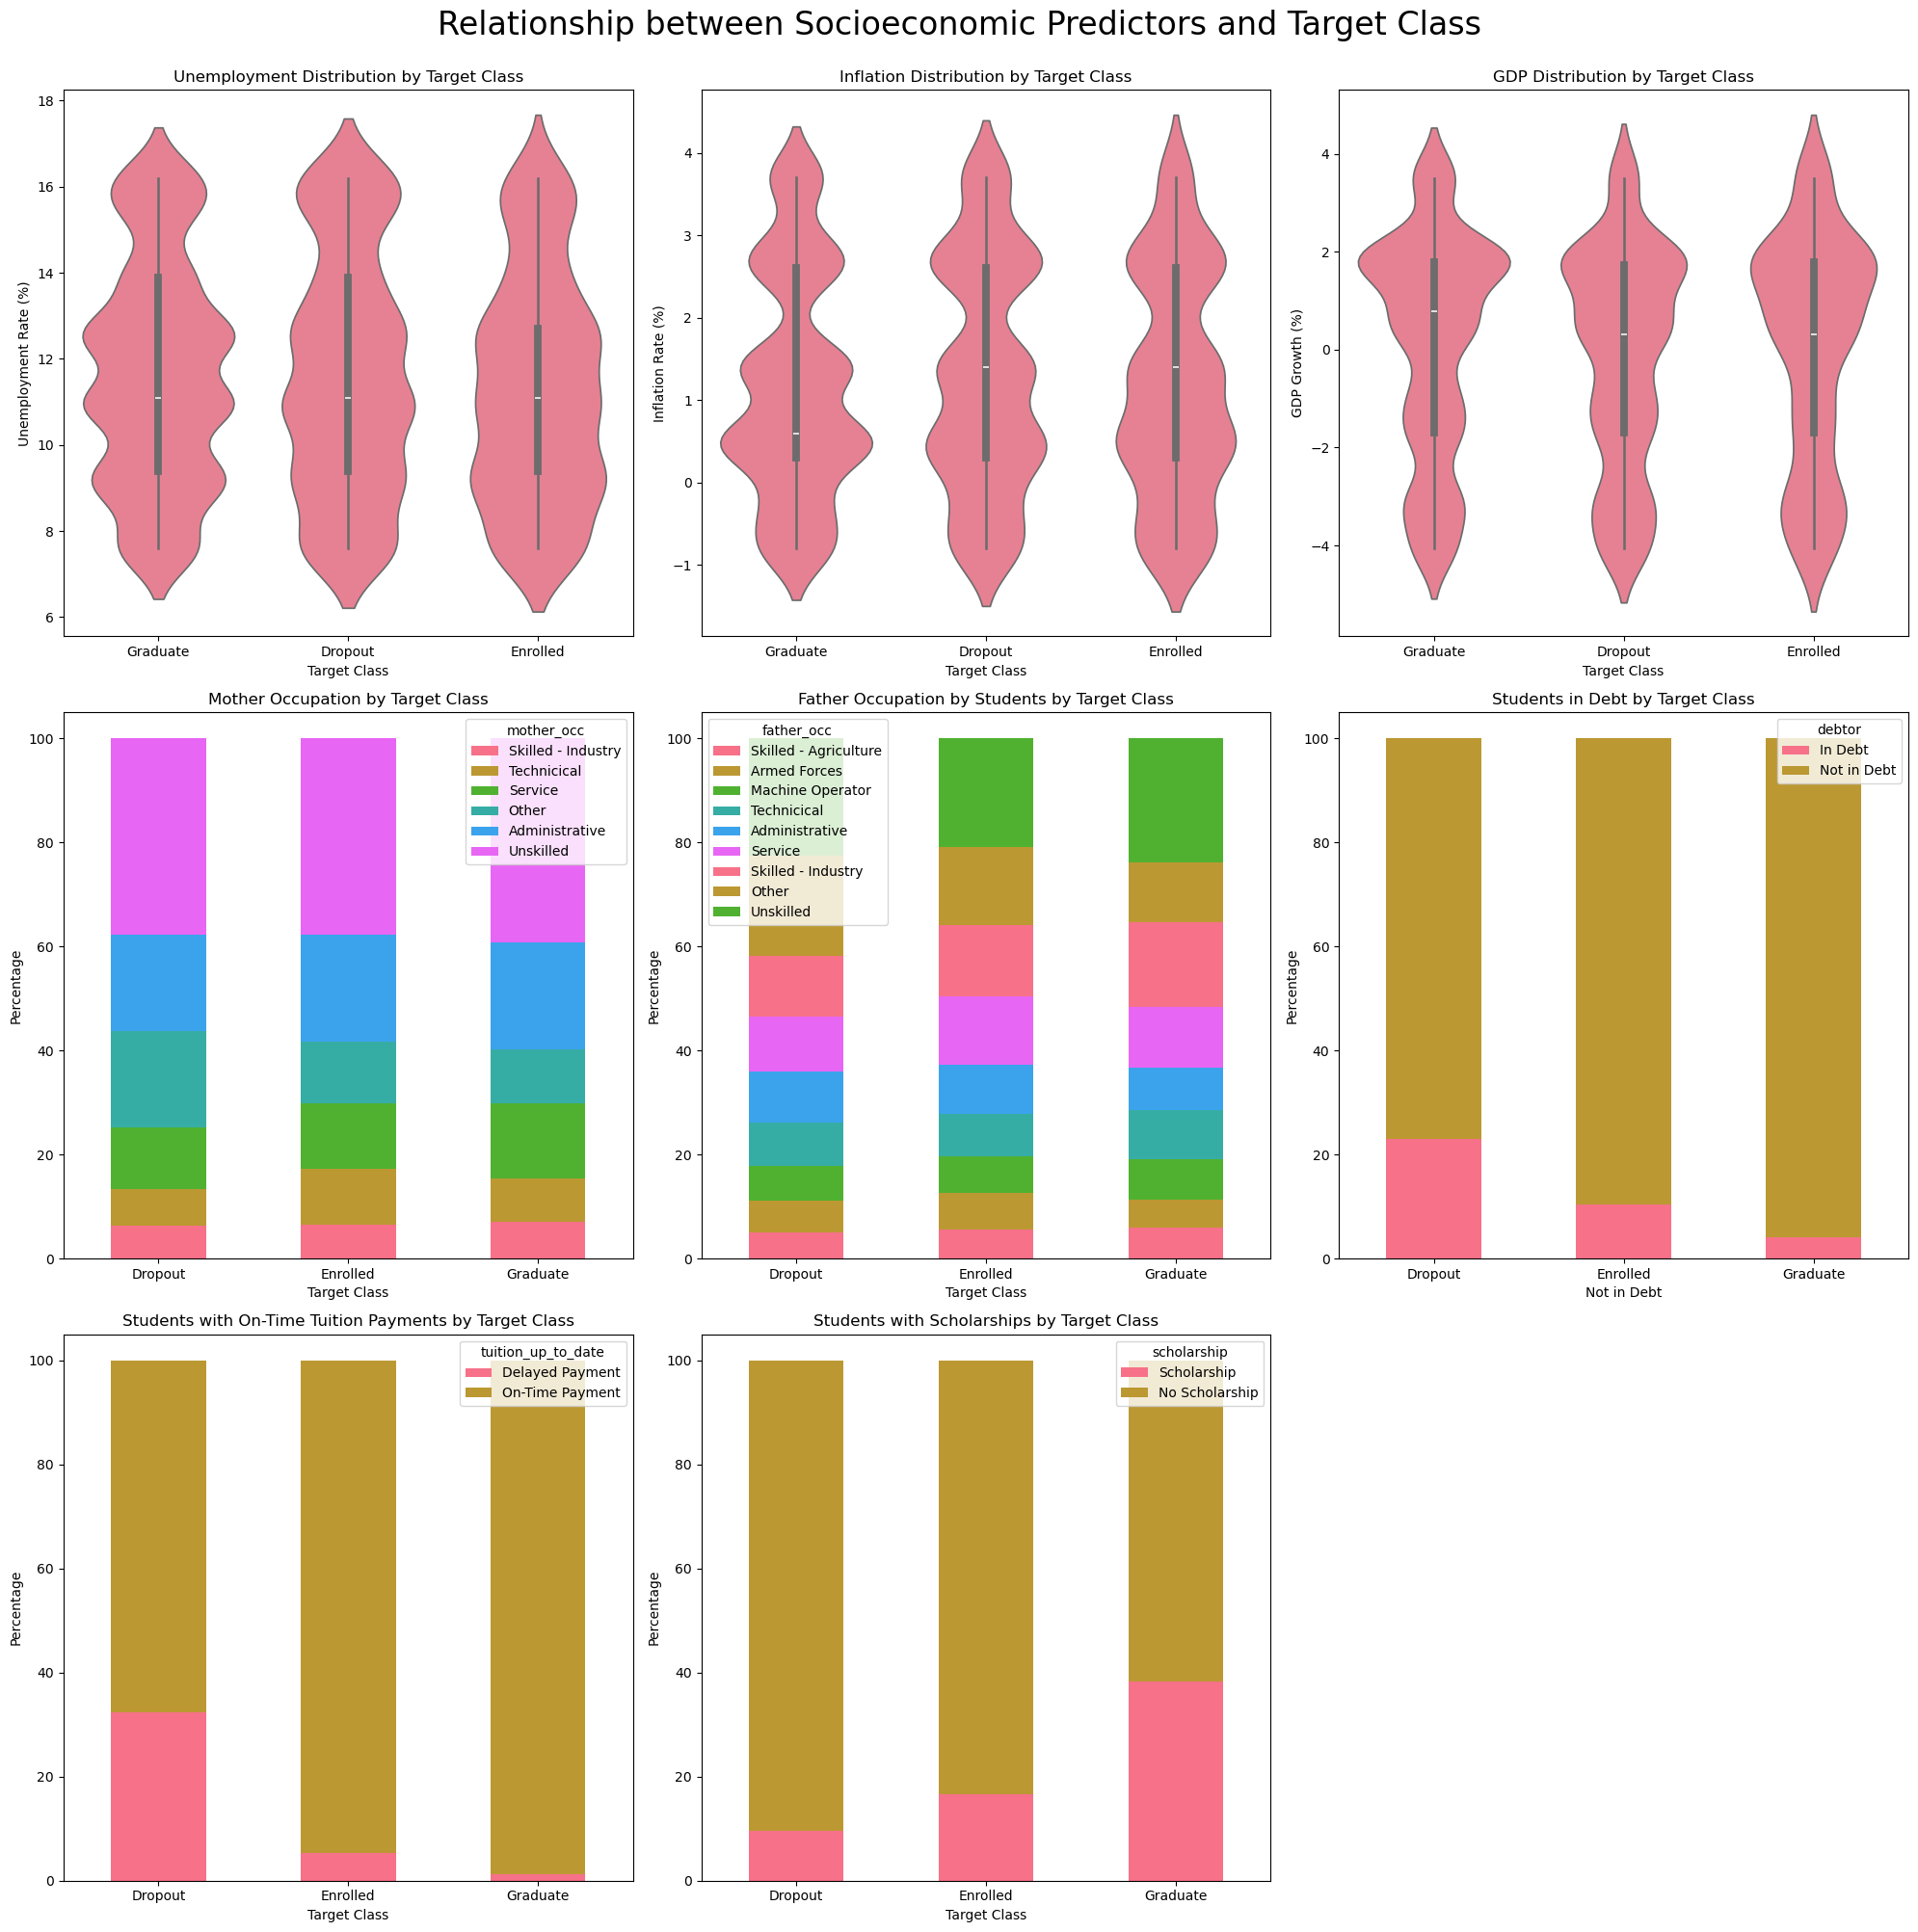

In [89]:
# subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
fig.suptitle('Relationship between Socioeconomic Predictors and Target Class', fontsize=24, y=1.00)

axes = axes.flatten()

plot_numeric(df_train, "target" , "unemployment", axes[0], title="Unemployment Distribution by Target Class", xlabel="Target Class", ylabel="Unemployment Rate (%)", rotate_labels=0, violin_kwargs=None)
plot_numeric(df_train, "target" , "inflation", axes[1], title="Inflation Distribution by Target Class", xlabel="Target Class", ylabel="Inflation Rate (%)", rotate_labels=0, violin_kwargs=None)
plot_numeric(df_train, "target" , "gdp", axes[2], title="GDP Distribution by Target Class", xlabel="Target Class", ylabel="GDP Growth (%)", rotate_labels=0, violin_kwargs=None)
plot_categorical(df_train, "target" , "mother_occ", axes[3], title="Mother Occupation by Target Class", value_map={3: "Technicical", 4: "Administrative", 5: "Service", 6: "Skilled - Agriculture", 7: "Skilled - Industry", 8: "Machine Operator", 9: "Unskilled", 10: "Armed Forces", -1: "Other"}, xlabel="Target Class", ylabel="Percentage", rotate_labels=0, bar_kwargs=None)
plot_categorical(df_train, "target" , "father_occ", axes[4], title="Father Occupation by Students by Target Class", value_map={3: "Technicical", 4: "Administrative", 5: "Service", 6: "Skilled - Agriculture", 7: "Skilled - Industry", 8: "Machine Operator", 9: "Unskilled", 10: "Armed Forces", -1: "Other"}, xlabel="Target Class", ylabel="Percentage", rotate_labels=0, bar_kwargs=None)
plot_categorical(df_train, "target" , "debtor", axes[5], title="Students in Debt by Target Class", value_map={0: "Not in Debt", 1: "In Debt"}, xlabel="Not in Debt", ylabel="In Debt", rotate_labels=0, bar_kwargs=None)
plot_categorical(df_train, "target" , "tuition_up_to_date", axes[6], title="Students with On-Time Tuition Payments by Target Class", value_map={0: "Delayed Payment", 1: "On-Time Payment"}, xlabel="Target Class", ylabel="Percentage", rotate_labels=0, bar_kwargs=None)
plot_categorical(df_train, "target" , "scholarship", axes[7], title="Students with Scholarships by Target Class", value_map={0: "No Scholarship", 1: "Scholarship"}, xlabel="Target Class", ylabel="Percentage", rotate_labels=0, bar_kwargs=None)
axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

In [90]:
print("\nSUMMARY: ACADEMIC PREDICTORS")
print("-" * 50)

print("\nNumeric Variables:")
print(summarize_numeric(df_train, academic_predictors))


SUMMARY: ACADEMIC PREDICTORS
--------------------------------------------------

Numeric Variables:
                    mean    std   min     max
prev_qual_grade   132.82  13.25  95.0  190.00
admission_grade   126.93  14.63  95.0  190.00
sem1_grade         10.63   4.87   0.0   18.88
sem1_approved       4.70   3.09   0.0   26.00
sem1_enrolled       6.27   2.49   0.0   26.00
sem1_evaluations    8.29   4.19   0.0   45.00
sem2_grade         10.20   5.25   0.0   18.57
sem2_approved       4.43   3.02   0.0   20.00
sem2_enrolled       6.22   2.20   0.0   23.00
sem2_evaluations    8.04   3.95   0.0   33.00


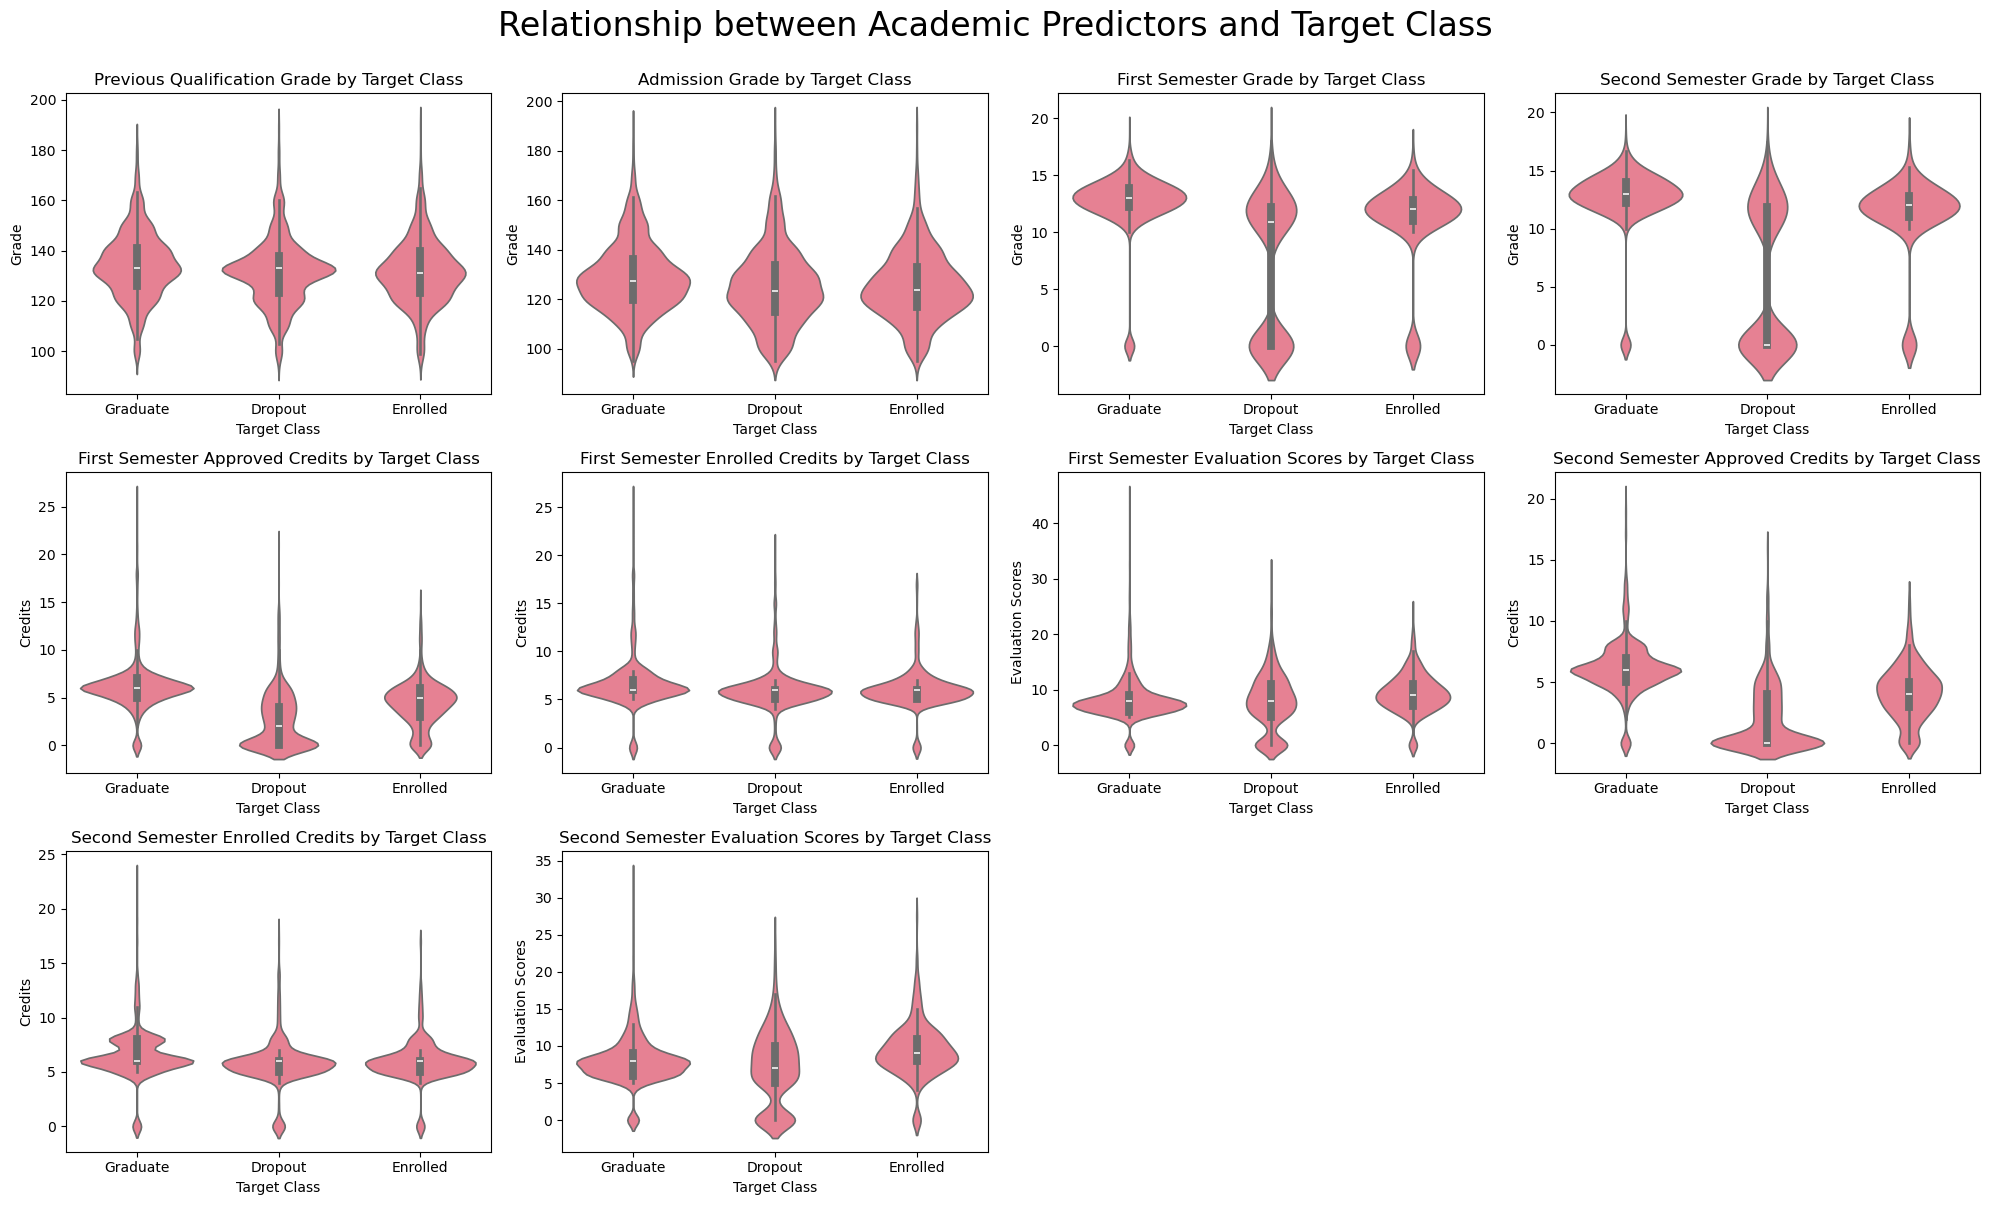

In [92]:
# subplots
fig, axes = plt.subplots(3, 4, figsize=(20, 12))
fig.suptitle('Relationship between Academic Predictors and Target Class', fontsize=24, y=1.00)

axes = axes.flatten()

plot_numeric(df_train, "target" , "prev_qual_grade", axes[0], title="Previous Qualification Grade by Target Class", xlabel="Target Class", ylabel="Grade", rotate_labels=0, violin_kwargs=None)
plot_numeric(df_train, "target" , "admission_grade", axes[1], title="Admission Grade by Target Class", xlabel="Target Class", ylabel="Grade", rotate_labels=0, violin_kwargs=None)
plot_numeric(df_train, "target" , "sem1_grade", axes[2], title="First Semester Grade by Target Class", xlabel="Target Class", ylabel="Grade", rotate_labels=0, violin_kwargs=None)
plot_numeric(df_train, "target" , "sem2_grade", axes[3], title="Second Semester Grade by Target Class", xlabel="Target Class", ylabel="Grade", rotate_labels=0, violin_kwargs=None)
plot_numeric(df_train, "target" , "sem1_approved", axes[4], title="First Semester Approved Credits by Target Class", xlabel="Target Class", ylabel="Credits", rotate_labels=0, violin_kwargs=None)
plot_numeric(df_train, "target" , "sem1_enrolled", axes[5], title="First Semester Enrolled Credits by Target Class", xlabel="Target Class", ylabel="Credits", rotate_labels=0, violin_kwargs=None)
plot_numeric(df_train, "target" , "sem1_evaluations", axes[6], title="First Semester Evaluation Scores by Target Class", xlabel="Target Class", ylabel="Evaluation Scores", rotate_labels=0, violin_kwargs=None)
plot_numeric(df_train, "target" , "sem2_approved", axes[7], title="Second Semester Approved Credits by Target Class", xlabel="Target Class", ylabel="Credits", rotate_labels=0, violin_kwargs=None)
plot_numeric(df_train, "target" , "sem2_enrolled", axes[8], title="Second Semester Enrolled Credits by Target Class", xlabel="Target Class", ylabel="Credits", rotate_labels=0, violin_kwargs=None)
plot_numeric(df_train, "target" , "sem2_evaluations", axes[9], title="Second Semester Evaluation Scores by Target Class", xlabel="Target Class", ylabel="Evaluation Scores", rotate_labels=0, violin_kwargs=None)
axes[-1].set_visible(False)
axes[-2].set_visible(False)

plt.tight_layout()
plt.show()

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

There are a few interesting observations from this exploratory data analysis.

The first is that academic predictors actually, at first glance, appear to be much poorer than I had anticipated. Notice that the grade distributions for all three class _prior to enrollment_ are nearly identical. That includes the "previous qualification" grade and the "admission" grade. This is startling, because it means that whatever afflictions plague students that require them to drop out in the Polytechnic Institute did not necessarily hurt them academically in their prior schooling. (The grading distributions _after_ enrollment do exhibit differences between classes; but this is likely due to the fact that people dropped out before receiving their grades, so they get a zero.)

Second, we can pretty clearly identify the best predictors, which are the ones that have the biggest differences in distribution between the various target classes. From the demographic predictor set, that would be gender, marital status, and whether or not the student was displaced. From the socioeconomic predictor set, that would be whether you are in debt, whether your tuition is paid on time, and whether you are on a scholarship. And finally, from the academic predictor set, that would be the First and Second Semester Approved Credits.

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

## Model 1: OvR Logistic Regression

Develop a One-vs-Rest Logistic Regression model to predict student outcomes. You are expected to perform model selection, tuning, evaluation, and interpretation.

**Instructions**:
1. **Model Selection & Training**
   - Train an **OvR Logistic Regression** model using appropriate hyperparameter tuning methods (e.g., cross-validation).
   - Explain and justify all modeling decisions, including any feature preprocessing, engineering, and/or selection, hyperparameter tuning, and regularization choices.

2. **Prediction Generation**
   - Generate predictions for the test dataset in `./data/X_test.csv`.
   - Save your predictions in the following file path: `./submissions/submission_logreg.csv`.
   - Follow the structure of the expected submission file provided in `./data/example_submissions/example_submission_logreg.csv`.

3. **Feature Importance & Interpretation**
   - Analyze and interpret the feature importance in your logistic regression model.
   - Provide visualizations and explanations to support your interpretations (e.g., coefficients of significant predictors).

**Kaggle Competition Link**: [Logistic Regression Kaggle Competition](https://www.kaggle.com/t/8e1458a396f54accb532b6afa535a8a9)

**Kaggle Rules Summary**:
- You **must use an OvR Logistic Regression model**.
- No additional data beyond what was distributed with the assignment may be used (data derived from the provided dataset is allowed).
- Submissions will be **disqualified** if their performance cannot be reproduced by the relevant model in your notebook.

---

Let's train our logistic regression, which will proceed in six steps.

1. Feature Preprocessing:
   a) Categorical Variables:
      - one-hot encoded categorical variables into binary predictors
      - dropped first category to avoid multicollinearity
      - Justification: Required for logistic regression to handle categorical data. Otherwise, there is no way for the model to know what "International" or "In-Debt" means!
   
   b) Numeric Variables:
      - applied StandardScaler to standardize all numeric features
      - justification: Ensures all features are on same scale for PCA and regularization. This is important because if you look at metrics like grades, the admissions grades are out of 200 whereas the grades post enrollment are only out of 20. Both PCA and Regularization are sensitive to the scale of input features. Variables with larger scales will dominate the first few principal components, and features with larger scales will have smaller coefficients to achieve the same effect, thus making feature selection with LASSO unreliable.
      
2. Dimensionality Reduction:
   - applied PCA to numeric features
   - grid searched over number of components (1-15)
   - justification: 
      * PCA reduces multicollinearity between numeric predictors
      * it captures the patterns in the numeric variables
      * I chose the # of components using cross-validation
      
3. Feature Engineering:
   - created polynomial features from PCA components
   - grid searched over degrees 1-3
   - justification:
      * allows model to capture non-linear relationships
      * PCA first reduces dimensionality to prevent polynomial explosion
      * Degree selected through cross-validation

4. Class Balancing with SMOTE:
   - applied SMOTE after preprocessing but before model fitting
   - creates synthetic samples of minority classes
   - Justification:
      * Data is imbalanced (Graduate: 50%, Dropout: 32%, Enrolled: 18%)
      * SMOTE creates synthetic examples of minority classes by interpolating between existing samples
      * Better than simple oversampling because it creates new, plausible examples rather than just duplicating existing ones
      * Applied after preprocessing to ensure synthetic samples maintain preprocessed data structure

4. Model Selection:
   - Chose Logistic Regression with LASSO (L1) regularization
   - Used OneVsRest strategy for multiclass
   - Justification:
      * L1 regularization performs feature selection
      * Interpretable coefficients
      * OneVsRest breaks complex 3-class problem into binary problems
      
5. Hyperparameter Tuning:
   - used 5-fold cross-validation with grid search
   - tuned:
      * number of PCs (1-15)
      * polynomial degree (1-3)
      * regularization strength (20 values log-spaced from 10^-2 to 10^2)
   - justification: 
      * cross-validation prevents overfitting, because it holds out validation data to prevent leakage
      * grid search finds optimal complexity
      * Log-spaced regularization values explore different strengths of L1 penalty

6. Evaluation:
   - cross validation accuracy (# correct preditions divided by # total predictions)
   - ROC curves and AUC scores (measures TPR and FPR and their ratio)
   - examined feature importance through LASSO coefficients. indicated the top few features

We can use the sklearn pipeline --- which calls `fit` on each step sequentially --- to accomplish this. Then we will use grid search to tune the hyperparameters and find optimal # of PCs, polynomial degree, and regularization strength.

In [93]:
# set up preprocessing for numeric predictors
numeric_transformer = Pipeline(steps=[
   ('scaler', StandardScaler()),
   ('pca', PCA()),
   ('poly', PolynomialFeatures(include_bias=False))
])

# set up preprocessing for categorical predictors
categorical_transformer = Pipeline(steps=[
   ('onehot', OneHotEncoder(drop = 'first', sparse_output = False))
])

pipeline = ImbPipeline([ 
    ('preprocessor', ColumnTransformer(transformers=[
       ('num', numeric_transformer, numeric_predictors),
       ('cat', categorical_transformer, categorical_predictors)
    ])),
    ('sampler', SMOTE(random_state=seed)),
    ('classifier', OneVsRestClassifier(LogisticRegression(
        penalty='l1', 
        solver='liblinear', 
        max_iter=1000, 
        random_state=seed
    )))
])

# update parameter names to match pipeline structure
params = {
    'preprocessor__num__pca__n_components': list(range(1, 15)),   # integers 1 thru 14 (number of numeric predictors)
    'preprocessor__num__poly__degree': list(range(1, 3)),
    'classifier__estimator__C': np.logspace(-2, 2, 10)    # note to self: penalty is 1/lambda
}

# grid search w/ cross val
grid_search = GridSearchCV(
    pipeline,
    params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1 
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 280 candidates, totalling 1400 fits


Best parameters: {'classifier__estimator__C': np.float64(1.6681005372000592), 'preprocessor__num__pca__n_components': 13, 'preprocessor__num__poly__degree': 1}
Best cross-validation score: 0.7508


Now, let's graph coefficient importance for each of the three models I just trained.

Number of models: 3

Top Features for Dropout Class
--------------------
                  Feature  Coefficient
34        On-Time Tuition    -2.568630
10                  PC 11     1.604412
20           mother_occ_3    -0.762093
1                    PC 2    -0.737403
14       marital_status_1     0.653071
2                    PC 3    -0.637809
15       marital_status_2     0.601196
17  International Student    -0.600714
26           father_occ_4     0.553567
12                    x12    -0.542926


Top Features for Enrolled Class
--------------------
                 Feature  Coefficient
34       On-Time Tuition     1.697523
5                   PC 6     0.799561
10                 PC 11    -0.685416
35  Receives Scholarship    -0.667073
20          mother_occ_3     0.547687
25          father_occ_3    -0.504572
14      marital_status_1    -0.467353
11                   x11    -0.460850
15      marital_status_2    -0.377879
9                  PC 10     0.374867


Top Features for Gradua

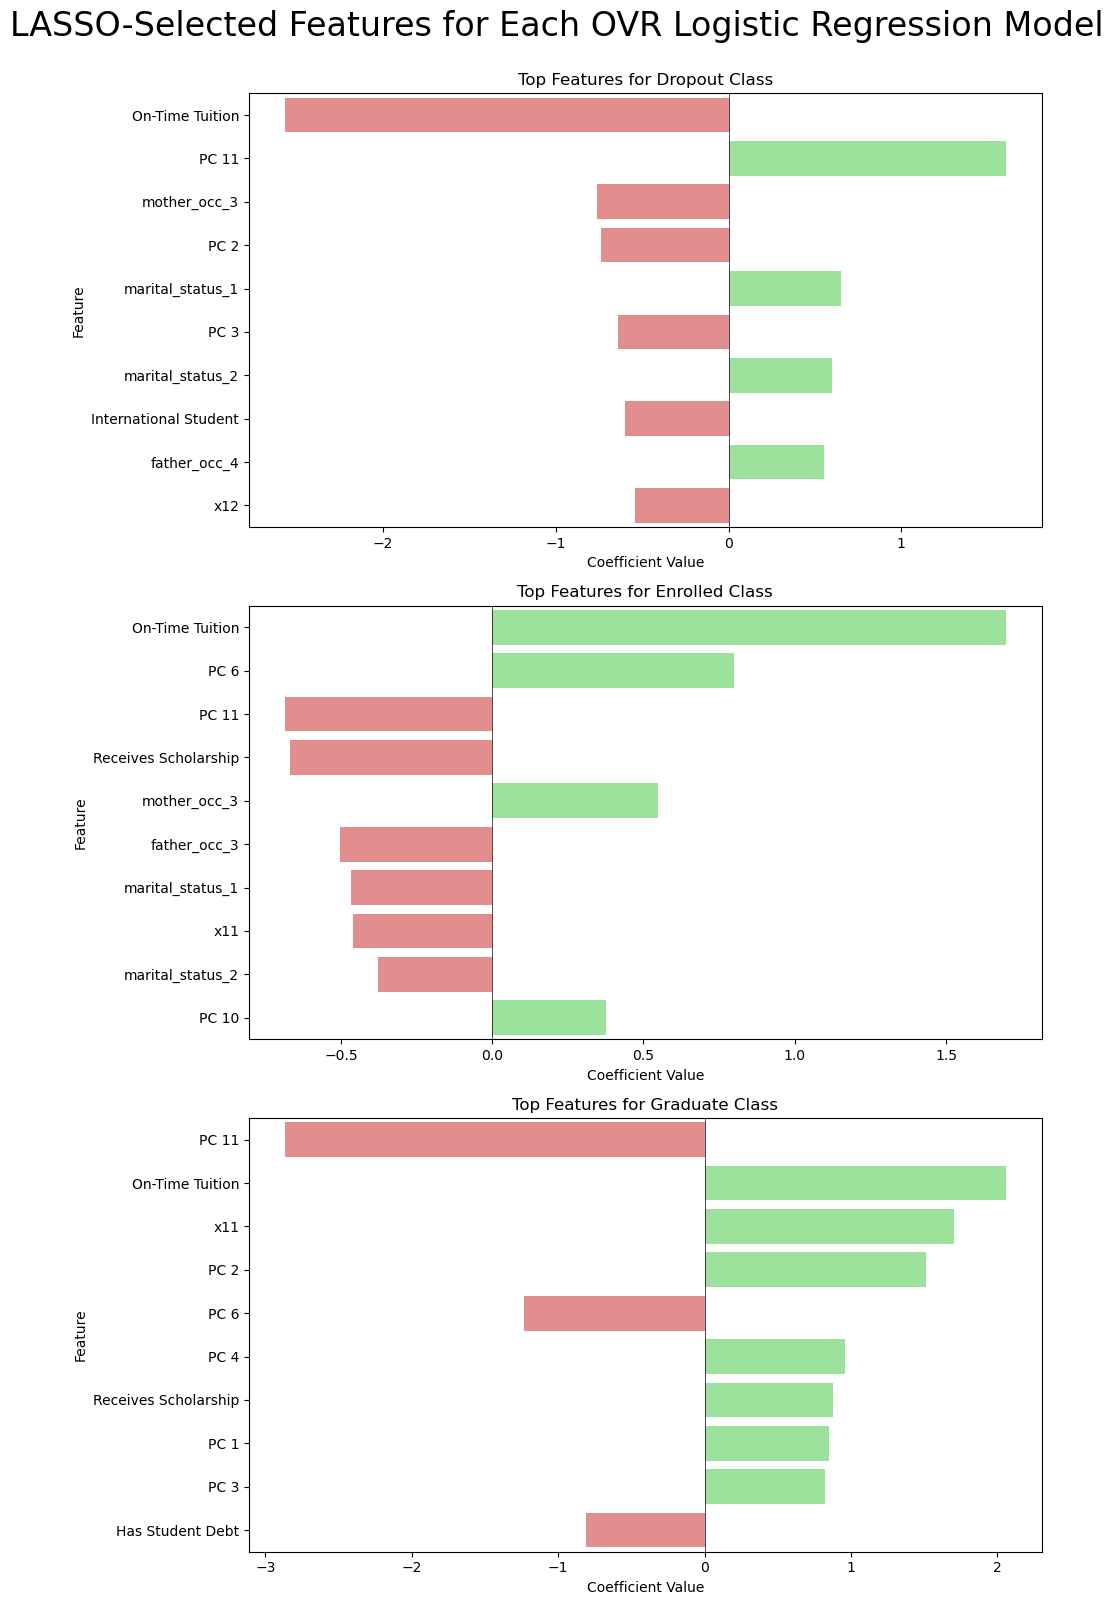

In [94]:
# extract the best model:
best_model_ovr = grid_search.best_estimator_

# get coefficients for each of the three ovr models I trained
estimators = best_model_ovr.named_steps["classifier"].estimators_
print(f"Number of models: {len(estimators)}\n")

# get feature names
numeric_predictor_names = (best_model_ovr.named_steps['preprocessor']
                .named_transformers_['num']
                .named_steps['poly']
                .get_feature_names_out())

categorical_predictor_names = (best_model_ovr.named_steps['preprocessor']
                      .named_transformers_['cat']
                      .named_steps['onehot']
                      .get_feature_names_out())

predictor_names = np.concatenate([numeric_predictor_names, categorical_predictor_names])


feature_mapping = {
    'tuition_up_to_date_1': 'On-Time Tuition',
    'x0': 'PC 1',
    'x1': 'PC 2',
    'x2': 'PC 3',
    'x3': 'PC 4',
    'x4': 'PC 5',
    'x5': 'PC 6',
    'x6': 'PC 7',
    'x7': 'PC 8',
    'x8': 'PC 9',
    'x9': 'PC 10',
    'x10': 'PC 11',
    'x10^2': 'PC 10 Squared',
    'x0 x10': 'PC 1 * PC 11',
    'x1 x10': 'PC 2 * PC 11',
    'x2 x10': 'PC 3 * PC 11',
    'x3 x10': 'PC 4 * PC 11',
    'x9 x10': 'PC 10 * PC 11',
    'father_occ_6': 'Father Skilled - Agriculture',
    'international_1': 'International Student',
    'debtor_1': 'Has Student Debt',
    'scholarship_1': 'Receives Scholarship'
}

# create a new figure for each model
fig, axes = plt.subplots(3, 1, figsize=(10, 16), sharey = False)
fig.suptitle('LASSO-Selected Features for Each OVR Logistic Regression Model', fontsize=24, y=1.00)


for i, (est, ax, class_name) in enumerate(zip(estimators, axes, best_model_ovr.classes_)):
    # Create coefficient DataFrame for this estimator
    coef_df = pd.DataFrame({
        'Feature': predictor_names,
        'Coefficient': est.coef_[0],
        'Abs_Coefficient': np.abs(est.coef_[0])
    })
    
    # map features
    coef_df['Feature'] = coef_df['Feature'].map(feature_mapping).fillna(coef_df['Feature'])

    # sort and get top features
    top_features = coef_df.nlargest(10, 'Abs_Coefficient')[['Feature', 'Coefficient']]
    
    print(f"Top Features for {class_name} Class")
    print("-"*20)
    print(f"{top_features}\n\n")
    
    # plot
    top_features['Sign'] = ['Negative' if x < 0 else 'Positive' for x in top_features['Coefficient']]
    hue_colors = {'Negative': 'lightcoral', 'Positive': 'lightgreen'}
    sns.barplot(data = top_features, y = 'Feature', x = 'Coefficient', ax = ax, hue = 'Sign', palette = hue_colors)
    ax.axvline(x = 0, color = 'black', linestyle = '-', linewidth = 0.5)
    ax.set_title(f'Top Features for {class_name} Class')
    ax.set_xlabel('Coefficient Value')
    ax.legend_.remove()


plt.tight_layout()
plt.show()

Notice that there is a significant overalap in the features that are significant for each of the three models. The "On-Time Tuition" indicator variable is a huge predictor of whether a student will drop out, will graduate, and will enroll. It has a negative coefficient for dropout (reduces dropout probability), and a strong positive coefficient for enrolled and graduate, whcih suggests financial stability is a key predictor of student success. This is further supported by the fact that scholarship status appears in all models.

In addition to this indicator, Principal Component #11, from the dimensionality reduction of the 15 numerical variables --- also seems to be a strong predictor for both the Dropout class and the Graduate class. Unfortunately, although the PC is significant, its meaning is obscured due to PCA. However, dimensionality reduction signficantly improves model performance, so the tradeoff is worthwhile.

Now, let's graph the ROC curve. Recall that because we used OVR, we have three models --- one to predict "Dropout", one to predict "Enrolled" and one to predict "Graduate". This means that we have three different ROC curves.

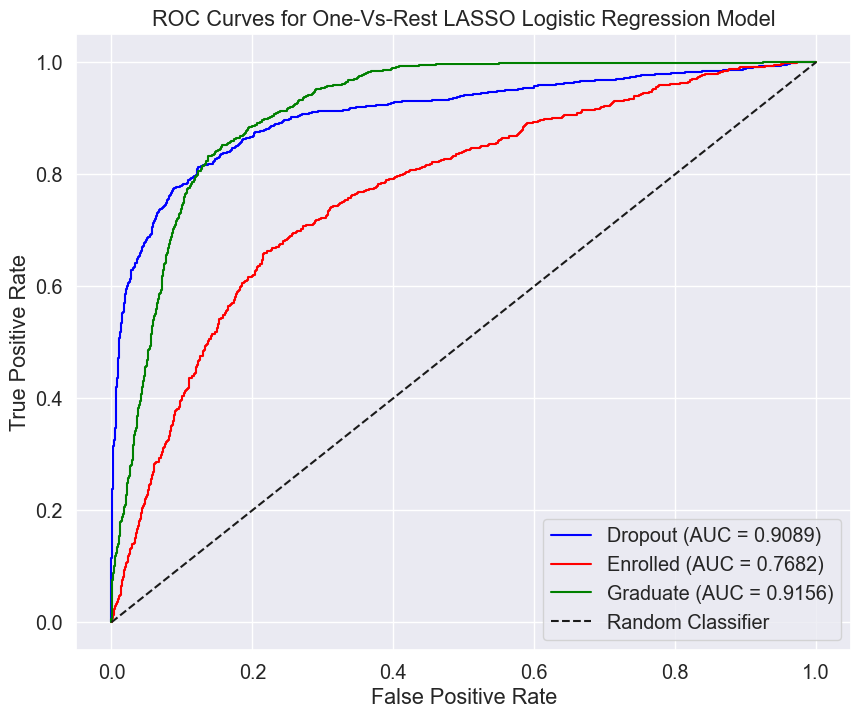

In [ ]:
plt.figure(figsize=(10, 8))

y_train_ravel = y_train.values.ravel()

# get cross validated probabilites (n x 3)
cv_probs = cross_val_predict(best_model_ovr, X_train, y_train_ravel, method='predict_proba', cv=10)

for i, (label, color) in enumerate(zip(best_model_ovr.classes_, ['blue', 'red', 'green'])):
    
    # get binary outcomes for each class
    y_binary = (y_train_ravel == label).astype(int)
        
    # get one-vs-rest probabilities 
    class_probs = cv_probs[:, i]
    
    # calculate ROC
    fpr, tpr, _ = roc_curve(y_binary, class_probs)
    roc_auc = auc(fpr, tpr)
    
    # plot ROC curve
    plt.plot(fpr, tpr, color=color, 
            label=f'{label} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for One-Vs-Rest LASSO Logistic Regression Model')
plt.legend()
plt.grid(True)
plt.show()

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

Clearly, the model performs significantly better than random. Notice that the "Dropout" classifier (AUC = 0.913) and the "Graduate" classifier (AUC = 0.918) both do quite well. They are not far off of a perfect classifier, which would have AUC = 1, where the true positive rate equals 1 for all probability thresholds. However, the "Enrolled" classifier (AUC = 0.79) does much worse. This is likely due to the class imbalance issue that I highlighted at the beginning of the workbook. Because there are fewer "enrolled" observations, the model has less data to learn the patterns specific to "enrolled" students and might be biased towards the majority classes. Even though I used SMOTE to correct for this. While SMOTE balances class sizes, it creates synthetic samples, these synthetic samples might not capture the true complexity of the "enrolled" state. Furthermore, SMOTE works in feature space after preprocessing, which might affect the quality of synthetic samples.

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

Finally, let's generate our predictions on the test set.

In [ ]:
logreg_predictions_df = pd.DataFrame({
   'ID': X_test.index,  # assuming this is the ID you want
   'LogReg_Predicted': best_model_ovr.predict(X_test)
})

logreg_predictions_df.to_csv('./submissions/submission_logreg.csv', index=False)


In [198]:
grader.check("logreg")

logreg results: All test cases passed!

## Model 2: Decision Tree Classifier

Develop a Decision Tree Classifier to predict student outcomes. You are expected to perform model selection, tuning, evaluation, and interpretation.

**Instructions**:
1. **Model Selection & Training**
   - Train a **Decision Tree Classifier** with hyperparameter tuning.
   - Justify your modeling decisions, including feature preprocessing, hyperparameter values (e.g., depth, splits), and pruning if applied.

2. **Prediction Generation**
   - Generate predictions for the test dataset.
   - Save your predictions in the following file path: `./submissions/submission_dt.csv`.
   - Follow the structure of the expected submission file provided in `./data/example_submissions/example_submission_dt.csv`.

3. **Feature Importance & Interpretation**
   - Analyze and interpret the feature importance of the decision tree model (e.g., Gini importance).
   - Visualize and explain which features had the most impact.

**Kaggle Competition Link**: [Decision Tree Kaggle Competition](https://www.kaggle.com/t/c2df59ec7be441fa84a882e2f2b8a03e)  
**Kaggle Rules Summary**:
- You **must use a Decision Tree Classifier**.
- No additional data beyond what was distributed with the assignment may be used (data derived from the provided dataset is allowed).
- Submissions will be **disqualified** if their performance cannot be reproduced by the relevant model in your notebook.

---

Let's now train our decision tree classifier which will proceed in the following steps:

1. Feature Preprocessing:

    - Categorical Variables
        - One-hot encoded categorical variables into binary predictors.
        - No need for dropping first category (tree can handle the redundancy)
        - Fill missing values with the most frequent value. 
        - Justification:
            - One hot encoding allows the decision tree to handle categorical data (and eases in our interpretability) but there is no need to drop_first since the tree can handle redundancy. 
            - Filling our missings with the most frequent value allows us to still use all of our predictors (even if some values are missing) while only introducing some small bias at the observational level. 

    - Numeric Variables 
        - No need for any preprocessing here. 
            - First, there is no need for feature scaling as we are using thresholds rather than distances when training our decision tree so different scales do not affect our overall fit or modeling process we do not need to engage in.
            - Second, we do not need to engage in PCA for the following reasons: We lose a degree of interpretability in the model when we use PCA and decision trees are robust to multicollinearity and irrelevant features by virtue of being nonliner and splitting on features maximizing info gain/reducing impurity. PCA would really only be helpful if we wanted to exploit computational efficiency or if we think there is a very large amount of noise or redundant features which I do not think is a significant issue. 
            - There is no need for polynomial transformation either since the decision tree can inherently capture our non-linear relationships in the data (splitting data on thresholds allows the model to create piecewise decision boundaries on its own). 

    - Response Variable
        - As we saw earlier, we have class imbalance in our data which is an issue as it means that accuracy can be misleading (a model can achieve pretty high accuracy by just predicting the majority class). I choose to deal with this issue by implementing SMOTE (synthetic minority samples). This is, in my opinion, better than throwing away valuable information by undersampling our majority class and adding in a degree of overfitting when we resample the same minority classes again. SMOTE, instead, balances the dataset by creating synthetic samples for the minority classes (usually this is done by selecting a minority sample, picking a nearest neighbor, and creating a new synthetic sample using some combination of these minority sample observations).


2. Model Selection Process:
    - First, I will use the Entropy score as our criterion for splitting the tree. Although Entropy is typically more computationally expensive, it tends to perform slightly better than the Gini index when training our model, and since we are worried about the particular accuracy (for our Kaggle submission) rather than computational power for this relatively small dataset, Entropy is best.
    - Next, I will try three different ways of controlling the complexity of the tree. This is done in order to account for the various ways the tree might perform better on the data (different datasets may benefit from different constraints). An example could be a noisy dataset where max depth might limit the tree from splitting too deeply on irrelevant features while ccp_alpha might retain splits on noisy features if their contribution slightly improves local accuracy. 
        - This method of testing different methods of limiting complexity also allows us a better chance of finding a better performing model.
    - The three ways I will try to control complexity for are:
        - Depth of the Tree (2 to 50 and max with stepsize of 2)
        - Max Leaves (5 to 125 and max with stepsize of 5)
        - CCP_Alphas (candidate values from DecisionTreeClassifier.cost_complexity_pruning_path())
    - I chose these for a few reasons:
        - CCP_Alpha was chosen as a method that could reduce overfitting while being more robust to the underfitting problem that max_depth or max_leaf_nodes can run into. 
        - Max_depth and max_leaf_nodes are two common methods of controlling for complexity where max_depth provides a local constraint limiting the depth of path from root to leaf but can have many leaf nodes along the way while max_leaf_nodes does not provide a constraint on depth but rather the number of leaf nodes. This could lead to an imbalanced tree. Both options have strengths and weaknesses here making it worth trying both. 
    - For each complexity method, I will chose the hyperparameter that performs best using a cross_validation method as this will prevent overfitting and find the optimal complexity. 
        - This will be done using grid search
        

3. Final Model Selection and Evaluation:
    - The final model will then be chosen from the model that performs best among our candidate models using the metric of mean cross validation accuracy. 
    - We will evaluate the model's performance using ROC and AUC scores as before (measures TPR and FPR and their ratio). 
    - We will also analyze feature importance using permutation importance given its higher robustness than built-in importance as discussed in class.

In [16]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

In [23]:
numeric_transformer = 'passthrough'

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output = False))
])

base_model = DecisionTreeClassifier(criterion='entropy', random_state=seed)

pipeline = ImbPipeline(steps=[
    ('preprocessor', ColumnTransformer(transformers=[
        ('num', numeric_transformer, numeric_predictors),
        ('cat', categorical_transformer, categorical_predictors)
    ])),
    ('smote', SMOTE(random_state=seed)),
    ('classifier', base_model)
])

# get cost complexity pruning path and array of ccp_alphas for our params grid
path = base_model.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas = path.ccp_alphas

params_grid = [
    {'classifier__max_depth': list(range(2, 51, 2))},

    {'classifier__max_leaf_nodes': list(range(5, 126, 2))},

    {'classifier__ccp_alpha': ccp_alphas}
]

# grid search w/ cross val
grid_search = GridSearchCV(
    pipeline,
    param_grid=params_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)


print("Best parameters:", grid_search.best_params_)
print(f"Best cross-validation score: {grid_search.best_score_:.4f}", )

Fitting 5 folds for each of 473 candidates, totalling 2365 fits
Best parameters: {'classifier__max_leaf_nodes': 65}
Best cross-validation score: 0.7288


/Users/abhayduggirala/micromamba/envs/cs109a/lib/python3.13/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


We see that our best model is the model with a max of 65 leave nodes. Now, we will print the actual tree and then analyze feature importance using permutation importance given its higher robustness tha built-in importance.

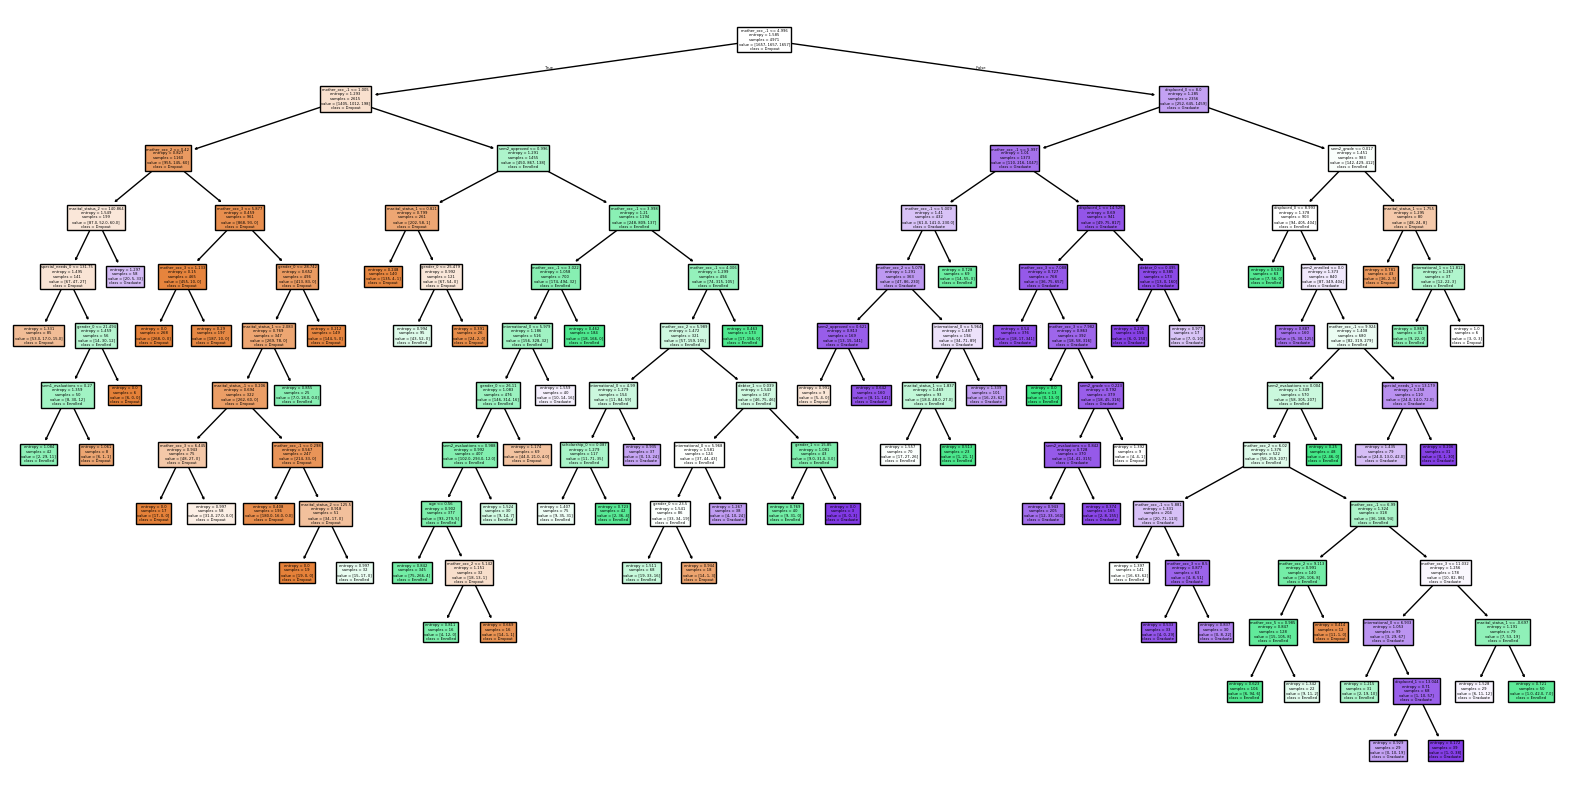

In [ ]:
best_model_dt = grid_search.best_estimator_

# get our best tree from our pipeline
best_tree = best_model_dt.named_steps['classifier']

# get our preprocessor in order to get transformed feature names since we onehotencoded.
preprocessor = best_model_dt.named_steps['preprocessor']
cat_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_predictors)
all_feature_names = list(cat_feature_names) + list(numeric_predictors)

plt.figure(figsize=(20, 10))
plot_tree(best_tree, feature_names=all_feature_names, class_names=best_tree.classes_, filled=True)

plt.show()

Permutation importance works as follows: Basically, we randomly permute the values of a feature and then evaluate the impact of that permutation on the model's performance (keeping allother features unchanged). Typically, the importance is calculated by looking at the difference in performance between the baseline model and the permuted model for that specific predictor. 

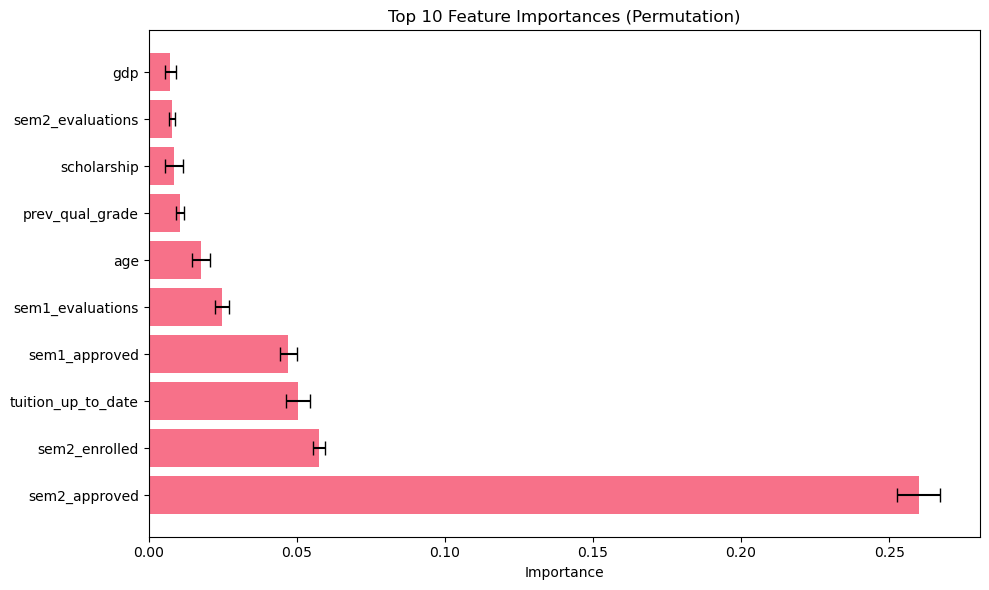

In [ ]:
# permutation importance 
from sklearn.inspection import permutation_importance

# get permutation importance
perm_importance = permutation_importance(best_model_dt, X_train, y_train, n_repeats=10, random_state=seed)

# create dataframe of permutation importances
perm_imp = pd.DataFrame({
    'feature': X_train.columns,
    'importance_mean': perm_importance.importances_mean,
    'importance_std': perm_importance.importances_std
}).sort_values('importance_mean', ascending=False)

# Plot top 10 features with error bars
plt.figure(figsize=(10, 6))
top_10 = perm_imp.head(10)
plt.barh(range(len(top_10)), top_10['importance_mean'],
         xerr=top_10['importance_std'], capsize=5)
plt.yticks(range(len(top_10)), top_10['feature'])
plt.title('Top 10 Feature Importances (Permutation)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

In [38]:
# merge X_train and y_train and then look at y_train values for when sem2_approved is 0
df_train = X_train.copy()

df_train['target'] = y_train

print(df_train[df_train['sem2_approved'] == 0]['target'].value_counts())
print(df_train[df_train['sem1_approved'] == 0]['target'].value_counts())

print(df_train[df_train['tuition_up_to_date'] == 0]['target'].value_counts())

target
Dropout     555
Graduate     60
Enrolled     49
Name: count, dtype: int64
target
Dropout     430
Graduate     61
Enrolled     53
Name: count, dtype: int64
target
Dropout     344
Enrolled     32
Graduate     21
Name: count, dtype: int64


<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

It appears that the most important feature category by a significant margin are the number of curricular units an individual has approved and their tuition status (all in the category of enrollment status for the semester). This makes a fair amount of sense because, as we see above in our analysis of the value counts for these variables, those who have basically no credits approved for the second semester or have a tuition that is not up to date are almost always dropouts. This variable thus is a pretty strong way for us to distinguish someone as a dropout or not. Thus, given this high predictability for being a dropout, these variables are quite important. In addition, it appears that less important predictors include age (a dropout appears to be more likely to be older given our EDA), scholarship status (more likely to be a graduate given our EDA graph), and their previous qualification grade which all appear to make intuitive sense as important predictors of a student's status.

Now, we will plot the confusion matrix for this model and get the classification report to see how the model generally performs.

              precision    recall  f1-score   support

     Dropout       0.89      0.70      0.78      1066
    Enrolled       0.49      0.63      0.55       595
    Graduate       0.83      0.87      0.85      1657

    accuracy                           0.77      3318
   macro avg       0.74      0.73      0.73      3318
weighted avg       0.79      0.77      0.78      3318



Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Classifier')

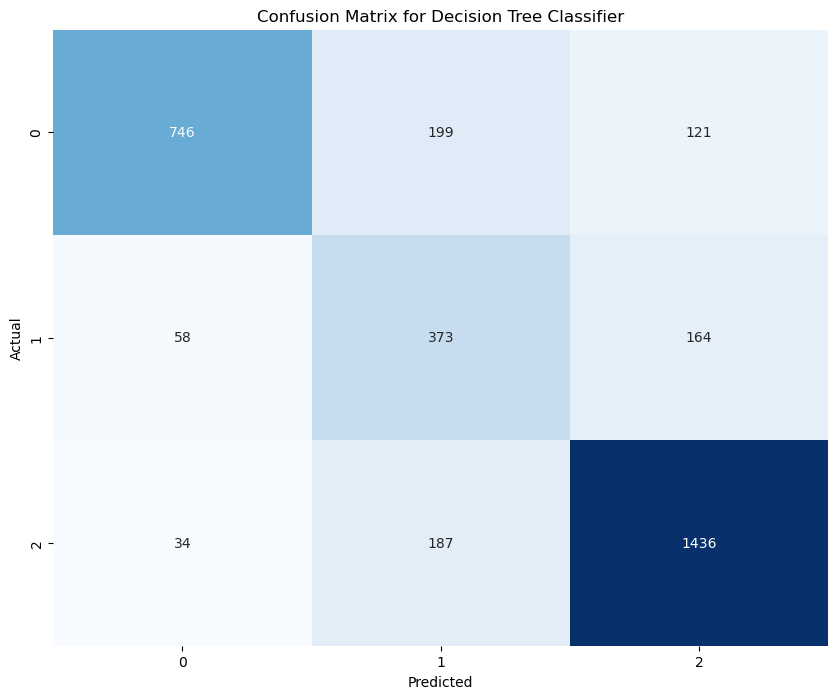

In [ ]:
# get classification report 
y_pred = best_model_dt.predict(X_train)

print(classification_report(y_train, y_pred))


# confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred)

# plot confusion matrix
plt.figure(figsize=(10, 8))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.xlabel('Predicted')

plt.ylabel('Actual')

plt.title('Confusion Matrix for Decision Tree Classifier')

We again see how the model performs worse for classifying individuals as enrolled. This is probably somewhat related to class imbalance and the general difficulty between distinguishing and enrolled student from a graduate (easier to distinguish between a dropout versus a graduate or enrolled student). 

#### COME BACK TO THIS AND RUN THE CLASSIFICATION REPORT FOR OUR LOGISTIC MODEL AND COMPARE!!!

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

Finally, let's generate our predictions on the test set. 

In [ ]:
decision_tree_predictions_df = pd.DataFrame({
    'ID': X_test.index,  # assuming this is the ID you want
    'DT_Predicted': best_model_dt.predict(X_test)
})

decision_tree_predictions_df.to_csv('./submissions/submission_dt.csv', index=False)

In [43]:
grader.check("dt")

dt results: All test cases passed!

## Model 3: Custom Model

Develop a custom model of your choice using any methods covered in class up through Lecture 20 (so not boosting, neural networks, etc.). You are expected to perform model selection, tuning, evaluation, and interpretation.

**Instructions**:
1. **Model Selection & Training**
   - Train a custom model of your choice, using any techniques and methods up to and including Lecture 20.
   - Provide a detailed explanation of your modeling choices, including preprocessing, hyperparameter tuning, and rationale for model selection.

2. **Prediction Generation**
   - Generate predictions for the test dataset.
   - Save your predictions in the following file path: `./submissions/submission_custom.csv`.
   - Follow the structure of the expected submission file provided in `./data/example_submissions/example_submission_custom.csv`.

3. **Feature Importance & Interpretation**
   - Analyze and interpret feature importance where possible for your selected model.
   - Provide visualizations and explanations to support your interpretations.

**Kaggle Competition Link**: [Custom Model Kaggle Competition](https://www.kaggle.com/t/bb69567807ff4c32ba8599c06e773b8c)  
**Kaggle Rules Summary**:
- The model must use only methods covered in class up to and including Lecture 20 (**no boosting, no neural networks, etc.**).
- Submissions will be **disqualified** if lacking sufficient description of the approach taken or if performance cannot be reproduced in your notebook.
- No additional data beyond what was distributed with the assignment may be used (data derived from the provided dataset is allowed).

---

Now, I will train a random forest on our data. There are a few reasons why I want to move from the decision tree and logistic regression into the random forest model. Firstly, I have already run the two other main classification methods that we are allowed to use for this problem (logistic regression and decision trees). This means that our decision is thus between whether we should use a bagging-based decision tree ensemble or a random forest. Both are better than the single decision tree as the decision tree model tends to underperform when compared with other classification or regression methods when we have complex boundaries or variance (hard to get these complex boundaries without high variance and overfitting and thus we usually underfit or overfit). These ensemble methods are better since the accuracy of a group of models tend to provide a better accuracy compared to individual models (avoiding overfitting, providing high expressiveness by the use of deeper trees, and reducing bias and variance). Now, I believe that a random forest is better than a bagging model for a few reasons: 1. The ensembles of trees in bagging tend to be correlated since bagging is a greedy algorithm. This is bad since it means that certain extremely strong predictors in our training data may be overrepresented (the iid assumption of our trees in our ensemble is violated). 2. The reduction of correlation among trees reduces the risk of overfitting. 3. Higher tree diversity from random forest can lead to better aggregation which improves generalization (reduction of variance without significantly increasing bias). 

Now, let us train this random forest classifier using the following steps (quite similar to the decision tree classifier since we are simply just running the same model but many times over bootstrapped datasets with predictor subsets at each split):

1. Feature Preprocessing: 
    - Categorical variables
        - One-hot encoded categorical variables into binary predictors
        - No need for dropping first category (tree can handle the redundancy)
        - Justification (same as previous problem)
    
    - Numeric variables 
        - No need for any preprocessing here (same justification as previous problem)

    - Response variables
        - SMOTE to deal with class imbalance as justified in the previous problem.
    

2. Model Selection Process
    - Again, I will use the Entropy score as our criterion for splitting the tree. The higher computational complexity is worth it (for reasons justified before).
    - There are multiple hyperparameters that we need to tune: The number of predictors to randomly select at each split, the total number of trees in the ensemble, and the stopping criteria (max_depth). 
    - The only stopping criteria I will tune in this case is max_depth. This is because ccp_alpha is no longer needed since the ensemble method itself helps deal with issues of overfitting and high variance. The max_leaf_nodes is also unneeded because it is not likely to be that much different from just fitting max_depth parameters given that we are going to be focusing on a complex model anyway (the greater computational complexity is not worth it here). 
    - Hyperparameter values to tune and justification:
        - Max_Depth: (3 to 13 and max with stepsize of 3) -- I decrease the possible depths because a model I had fit earlier with a higher depth overfit the data (perfectly predicted the test set). This is a red flag as it is a signal that the model is likely to not generalize well to some training data. 
        - Number of Trees: (100 to 500, with stepsize of 100). We choose these numbers since generally adding more trees is helpful but only up to a certain point which I expect to be around 500 given the size of our dataset (and further iterations make the computation time of the model too high). 
        - Max_features: (sqrt or log2). Sqrt is the method most long time practicioners use for classification and log2 is another popular method. We will try both.
    - I will choose the combination of hyperparameters that performs best using a out-of-bag error method. I use this over cross validation since with cross validation there is a leakage of data (every validation has been seen in training by a few decision trees and there is thus some form of leakage). OOB prevents leakage and has a lower computation cost. 

3. Final Model Selection and Evaluation
    - The final model will then be chosen as the model that performs best among our candidate models using the metric of out of bag error. 
    - We will then evaluate the model's performance using a confusion matrix and classification report (F1, accuracy, recall scores). 
    - We will also analyze feature importance using permutation importance given its higher robustness than built-in importance as discussed in class.

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
# going to define a function to tune our hyperparameters for a random forest using OOB since one does not exist in sklearn

def tune_random_forest(X_train, y_train, params_grid, random_state, preprocessor=None):
    """
    Function to tune a random forest model using OOB error for hyperparameter tuning
    """
    # create vars to store our best params and our best oob score
    best_params = None
    best_oob_score = 0
    results = []

    # iterate through all possible hyperparam combos 
    for max_depth in params_grid.get('max_depth'):
        for n_estimators in params_grid.get('n_estimators'):
            for max_features in params_grid.get('max_features'):
                # initialize our rf model with entropy criterion and our hyperparams
                rf_model = RandomForestClassifier(
                    criterion='entropy',
                    oob_score=True,
                    n_estimators=n_estimators,
                    max_depth=max_depth,
                    max_features=max_features,
                    random_state=seed
                )

                # create pipeline making sure to use SMOTE
                model = ImbPipeline(steps=[
                    ('preprocessor', preprocessor),
                    ('smote', SMOTE(random_state=seed)),
                    ('classifier', rf_model)
                ])

                # fit our model
                model.fit(X_train, y_train)

                # get oob score and append to results
                oob_score = model.named_steps['classifier'].oob_score_

                results.append({
                    'max_depth': max_depth,
                    'n_estimators': n_estimators,
                    'max_features': max_features,
                    'oob_score': oob_score
                })
                # if oob_score is better, update our best params
                if oob_score > best_oob_score:
                    best_oob_score = oob_score
                    best_params = {
                        'max_depth': max_depth,
                        'n_estimators': n_estimators,
                        'max_features': max_features
                    }
    return {'best_params': best_params, 'best_oob_score': best_oob_score, 'results': results}




In [67]:
numeric_transformer = 'passthrough'

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output = False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_predictors),
    ('cat', categorical_transformer, categorical_predictors)
])

params_grid = {
    'max_depth': list(range(3, 13, 3)),
    'n_estimators': list(range(100, 500, 100)),
    'max_features': ['sqrt', 'log2'],
}

# to avoid errors
y_train_2 = y_train.values.ravel()

tuned_rf = tune_random_forest(X_train, y_train_2, params_grid, seed, preprocessor)

print("Best parameters:", tuned_rf['best_params'])



Best parameters: {'max_depth': 12, 'n_estimators': 300, 'max_features': 'sqrt'}


In [68]:
# train our best model
rf_model = RandomForestClassifier(
    criterion='entropy',
    n_estimators=tuned_rf['best_params']['n_estimators'],
    max_depth=tuned_rf['best_params']['max_depth'],
    max_features=tuned_rf['best_params']['max_features'],
    random_state=seed
)

model = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=seed)),
    ('classifier', rf_model)
])

model.fit(X_train, y_train_2)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['age', 'unemployment',
                                                   'inflation', 'gdp',
                                                   'prev_qual_grade',
                                                   'admission_grade',
                                                   'sem1_grade',
                                                   'sem1_approved',
                                                   'sem1_enrolled',
                                                   'sem1_evaluations',
                                                   'sem2_grade',
                                                   'sem2_approved',
                                                   'sem2_enrolled',
                                                   'sem2_evaluations']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['gender', 'marital_status',
                                                   'special_needs',
                                                   'international', 'displaced',
                                                   'mother_occ', 'father_occ',
                                                   'debtor',
                                                   'tuition_up_to_date',
                                                   'scholarship'])])),
                ('smote', SMOTE(random_state=109)),
                ('classifier',
                 RandomForestClassifier(criterion='entropy', max_depth=12,
                                        n_estimators=300, random_state=109))])

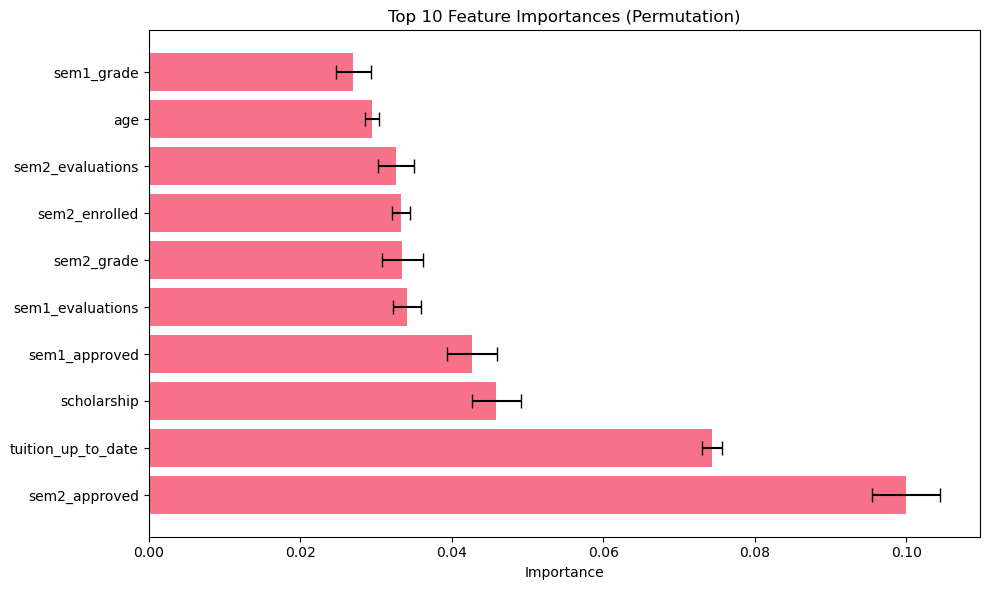

In [69]:
# get our best tree from our pipeline
best_rf = model.named_steps['classifier']

# get permutation importance
perm_importance = permutation_importance(model, X_train, y_train_2, n_repeats=10, random_state=seed)

# Create dataframe of permutation importances
perm_imp = pd.DataFrame({
    'feature': X_train.columns,
    'importance_mean': perm_importance.importances_mean,
    'importance_std': perm_importance.importances_std
}).sort_values('importance_mean', ascending=False)

# Plot top 10 features with error bars
plt.figure(figsize=(10, 6))
top_10 = perm_imp.head(10)
plt.barh(range(len(top_10)), top_10['importance_mean'],
         xerr=top_10['importance_std'], capsize=5)
plt.yticks(range(len(top_10)), top_10['feature'])
plt.title('Top 10 Feature Importances (Permutation)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

We see that our feature importance changed significantly from our initial decision tree in the previous problem. Tuition and semester 2 approved credits are still important features likely due to their ability to predict dropouts. Scholarship appears to be still be quite helpful in predicting those who graduate and is probably the best way the model has to distinguish between enrolled and graduate students. Importantly, though, it seems that features such as age matter more (which was a strong way to figure out if someone was a dropout). However, it appears that a majority of our important features are related to evaluations, grades, and approved/enrolled credits which do appear to distinguish slightly between graduates, dropouts, and enrolled students based on our EDA. 

Now, we will plot the confusion matrix for this model to get the classification report to see how the model generally performs.

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

              precision    recall  f1-score   support

     Dropout       0.99      0.89      0.94      1066
    Enrolled       0.85      0.90      0.87       595
    Graduate       0.93      0.97      0.95      1657

    accuracy                           0.93      3318
   macro avg       0.92      0.92      0.92      3318
weighted avg       0.94      0.93      0.93      3318



Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier')

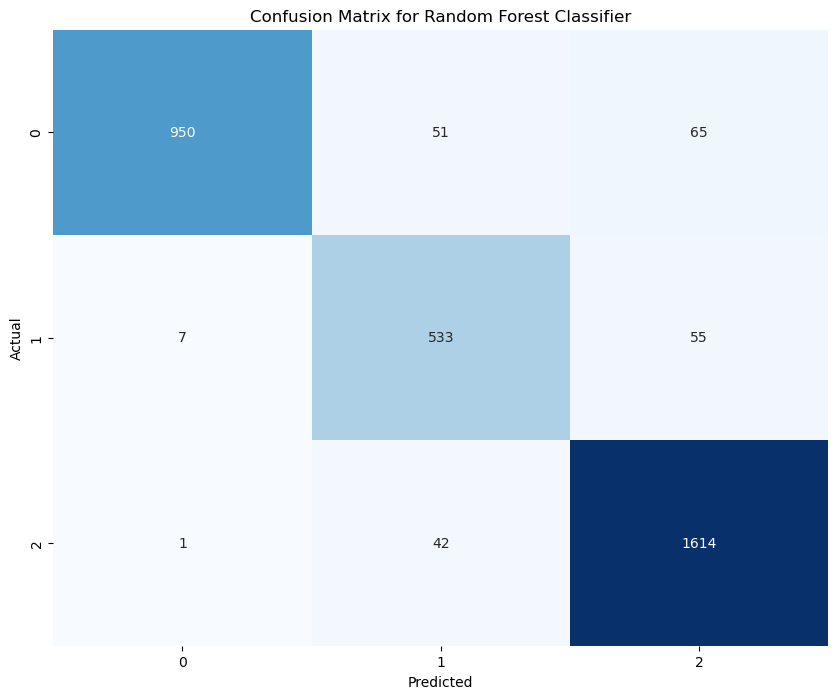

In [72]:
# get classification report
y_pred = model.predict(X_train)

print(classification_report(y_train, y_pred))

# confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred)

# plot confusion matrix
plt.figure(figsize=(10, 8))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.xlabel('Predicted')

plt.ylabel('Actual')

plt.title('Confusion Matrix for Random Forest Classifier')

The model, as the models before, performs worse for classifying individuals as enrolled. It appears that the main issue continues to be distinguishing enrolled individuals from graduates, especially given the class imbalance. The precision, f1-scores, and recall scores are entirely better than the decision tree model which is likely due to the greater complexity of this model and its greater ability to capture smaller nuances/complex decision boundaries in the data. Though, given my previous problems with overfitting for this model, the great performance on the training data is slightly worrying with regard to the generalizability of the model. 

In [73]:
custom_model_predictions = pd.DataFrame({
    'ID': X_test.index,  # assuming this is the ID you want
    'Custom_Predicted': model.predict(X_test)
})

custom_model_predictions.to_csv('./submissions/submission_custom.csv', index=False)

In [57]:
grader.check("custom")

custom results: All test cases passed!

## Model Comparison & Kaggle Submission
- **Compare** all three models based on metrics such as F1 score, accuracy, and interpretability. There are many possible metrics for comparison. Consider those you judge to be particularly relevant for potential use cases of your classifier. 
- **Discuss** the strengths and weaknesses of each approach.
- Submit your **best predictions** for each model to the 3 Kaggle competitions.
    - [OvR Logistic Regression](https://www.kaggle.com/t/8e1458a396f54accb532b6afa535a8a9)
    - [Decision Tree Classifier](https://www.kaggle.com/t/c2df59ec7be441fa84a882e2f2b8a03e)
    - [Custom Model](https://www.kaggle.com/t/bb69567807ff4c32ba8599c06e773b8c)

---

In [ ]:
# make a table where we have the F1 score, accuracy for each model
# get the predictions for each model
logreg_predictions = best_model_ovr.predict(X_train)
dt_predictions = best_model_dt.predict(X_train)
rf_predictions = model.predict(X_train)

# get the metrics for each model
logreg_f1 = f1_score(y_train, logreg_predictions, average='weighted')
dt_f1 = f1_score(y_train, dt_predictions, average='weighted')
rf_f1 = f1_score(y_train, rf_predictions, average='weighted')

logreg_rec = recall_score(y_train, logreg_predictions)
dt_rec = recall_score(y_train, dt_predictions)
rf_rec = recall_score(y_train, rf_predictions)

# create a dataframe
model_metrics = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'F1 Score': [logreg_f1, dt_f1, rf_f1],
    'Recall Score': [logreg_rec, dt_rec, rf_rec]
})

model_metrics

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

- use f1 and recall because dont want to use accuracy by itself since the data is imbalanced so accuracy can be pretty misleading. recall is a better measure, but in this case, false negatives are more problematic than false positives (want to capture as many true positives as possible even at th ecost of more false positives). This could be more useful for an educational institution as they probably want to get as many true positives for dropouts as possible (even if they got some false positives) as this can help them divert their resources to the right people who might need help. The f1 score is also used as it is a good balance between precision and recall and is a strong metric to capture model performance in the case of class imbalance. It could be that the university does not want to have a false positive for a dropout either since this might lead them to waste resources on these people or give up on them and thus a balanced method might be better for their goals. 
- rf performs best on these metrics...need to check logreg and dt and compare

- strengths of dt over logistic reg is ability to get more complex relationships modeled while the parametric model of the logistic reg is limited in this case. also, much more interpretable (most interpretable, even compared to rf). 
- rf better since it deals with the issue of higher variance while allowing the model to take into account much more complex relationships without overfitting. also, lack of correlation in trees to some degree.
- logistic is less intepretable given its coefficients so hard to see importance (PCA masks this). It is much less computationally expensive compared to RF while RF is also a black-box model that is harder to explain predictions for. RF is also possible to be very susceptible to overfitting, especially as we saw with its very strong test performance. Regularized logistic regression can also handle multicollinearity quite well by shrinking coefficients of correlated features while RF may do worse here as it can give disproportionate importance to one feature over correlated counterparts.
- RF, though, can do well with nonlinear relationships, feature importance and interpretability here, strong generalization through the ensemble nature of its method, and the potential to be robust against small variations in the data or noisy patterns. 

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

## Bonus: Causal Inference
- (Optional) Perform a causal inference analysis on a feature of your choice using one of the trained models.
- Use a technique discussed in class, such as **propensity score matching**.

---

In [ ]:
# your code here
...

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

_Type your answer here, replacing this text._

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

## Wrap-up and Reflection
- Provide insights on how these models could be used by educational institutions to improve student outcomes.
- Please describe the aspect(s) of the assignment you found most challenging. This could be conceptual and/or related to coding and implementation. This is also a good place to ask any remaining questions you may have.
- How many hours did you spend working on this assignment? Store this as an int or float in `hours_spent_on_hw`. If you worked on the project in a group, report the *average* time spent per person.

---

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

_Type your answer here, replacing this text._

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

In [ ]:
hours_spent_on_hw = ...

In [ ]:
grader.check("wrapup")

wrapup results:
    wrapup - 1 result:
        ❌ Test case failed
        Trying:
            assert float(hours_spent_on_hw), 'Please select a time in hours (int or float) to specify how long you spent on this assignment.'
        Expecting nothing
        **********************************************************************
        Line 1, in wrapup 0
        Failed example:
            assert float(hours_spent_on_hw), 'Please select a time in hours (int or float) to specify how long you spent on this assignment.'
        Exception raised:
            Traceback (most recent call last):
              File "/Users/julienberman/micromamba/envs/cs109a/lib/python3.13/doctest.py", line 1395, in __run
                exec(compile(example.source, filename, "single",
                ~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                             compileflags, True), test.globs)
                             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
              File "<doctest wrapup 0[0]>", line 1, in <module>
                assert float(hours_spent_on_hw), 'Please select a time in hours (int or float) to specify how long you spent on this assignment.'
                       ~~~~~^^^^^^^^^^^^^^^^^^^
            TypeError: float() argument must be a string or a real number, not 'ellipsis'

In [ ]:
notebook_end = time.time()
print(f"It took {(notebook_end - notebook_start)/60:.2f} minutes for this notebook to run")

It took 0.07 minutes for this notebook to run


🌈 **This concludes HW5. Thank you!**
